# Regressão Linear para o ramo imobiliário 


## Introdução

Machine learning, mais especificamente o campo da modelagem preditiva, preocupa-se principalmente em minimizar o erro de um modelo ou fazer as previsões mais precisas possíveis, em detrimento da explicabilidade. No aprendizado de máquina aplicado, emprestaremos, reutilizaremos e roubaremos algoritmos de muitos campos diferentes, incluindo estatísticas, e os usaremos para esses fins.

Como tal, a regressão linear foi desenvolvida no campo da estatística e é estudada como um modelo para entender a relação entre variáveis ​​numéricas de entrada e saída, mas foi emprestada pelo aprendizado de máquina. É um algoritmo estatístico e um algoritmo de aprendizado de máquina e sua representação é uma equação linear que combina um conjunto específico de valores de entrada (x) cuja solução é a saída prevista para esse conjunto de valores de entrada (y). Como tal, os valores de entrada (x) e o valor de saída são numéricos. 

Tal equação atribui um fator de escala para cada valor de entrada ou coluna, chamado de coeficiente e representado pela letra grega maiúscula Beta (B). Um coeficiente adicional também é adicionado, dando à linha um grau de liberdade adicional (por exemplo, movendo-se para cima e para baixo em um gráfico bidimensional) e é freqüentemente chamado de interceptação ou coeficiente de polarização.

Em um problema de regressão simples (um único x e um único y), a forma do modelo seria:

                            y = B0 + B1*x 


Em dimensões superiores, quando temos mais de uma entrada, a linha é chamada de plano ou hiperplano. A representação, portanto, é a forma da equação e os valores específicos usados ​​para os coeficientes (por exemplo, B0 e B1 no exemplo acima).


## Dataset

O conjunto de dados descreve a venda de propriedades residenciais individuais da cidade de Boston, de 2006 a 2010, ele contém 2.930 observações e um grande número de features (23 nominais, 23 ordinais, 14 discretas e 20 contínuas) envolvidas na avaliação do valor dos imóveis, ou seja, são 80 variáveis explicativas.

Geralmente, as 20 features ​​contínuas estão relacionadas com várias dimensões de área para cada imóvel. Além do típico tamanho do lote e da metragem quadrada total da área habitável, outras variáveis ​​mais específicas são quantificadas no conjunto de dados. Medidas da área do porão, área da sala de estar e até mesmo das varandas estão presentes e divididas em categorias individuais com base na qualidade e no tipo.

## Projeto

Agora que o básico da teoria e as informações sobre o dataset foram passadas, vamos colocar a mão na massa. 


     
Nosso projeto será dividido em 3 partes:
* Limpeza do dataset.
* Achar as features mais importantes, e realizar uma regressão OLS, com um R² superior a 85%.
* Stacking

## Limpeza do dataset

In [ ]:
# Importar bibliotecas 

# Bibliotecas para manipulação do dataset
import pandas as pd
import numpy as np

# Bibliotecas para plotagem gráfica  
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca para análise estatistica
import scipy
from sklearn.pipeline import make_pipeline

# Eliminar os avisoss 
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# Algumas funções úteis 

def plot_bar(df):
  f, ax = plt.subplots(6, 6, figsize=(25, 27))
  num_vars = df.columns[df.dtypes != 'category']
  for i, c in enumerate(num_vars):
      g = sns.boxplot(df[c], ax=ax[i//6, i%6], color='r')
  f.text(0.4, .90, 'Distribution of numerical vars', size=20, weight='bold', color='black')
  plt.show()

def plot_hist(df):
  f, ax = plt.subplots(6, 6, figsize=(25, 30))
  num_features = df.columns[df.dtypes != 'category']
  for i, c in enumerate(num_features):
      g = sns.histplot(df[c], ax=ax[i//6, i%6], color='r')
  f.text(0.4, .90, 'Distribution of numerical vars', size=20, weight='bold', color='black')
  plt.show()

In [ ]:
# Importar o dataset
df = pd.read_csv('base.csv')

### Valores faltantes 

Dados faltantes são dados que não são armazenados para uma variável na observação de interesse. O problema da falta de dados é relativamente comum em quase todas as pesquisas e pode ter um efeito significativo nas conclusões que podem ser tiradas dos dados. Assim, alguns estudos se concentraram no tratamento de dados perdidos, problemas causados ​​por dados perdidos e os métodos para evitá-los ou minimizá-los.

Dados ausentes apresentam vários problemas. Primeiro, a ausência de dados reduz o poder estatístico, dados perdidos podem causar viés na estimativa dos parâmetros, podem reduzir a representatividade das amostras e complicar a análise do estudo. Cada uma dessas distorções pode ameaçar a validade dos ensaios e levar a conclusões inválidas.

In [ ]:
# Vamos ver os tipos de dados contidos no dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [ ]:
# Temos uma coluna que contém um erro de digitação 'QualdiadeLareira', vamos consertar  

df.rename(columns={'QualdiadeLareira': 'QualidadeLareira'}, inplace=True)

Olhando a quantidade de valores não-nulos, é possível perceber que nós temos várias colunas que possuem valores faltantes. 

In [ ]:
# Vamos ver a porcentagem de valores nulos em cada coluna 

null = (df.isnull().sum() / len(df)) * 100
null = null.drop(null[null == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null})
missing_data.head(20)

,Missing Ratio
QualidadePiscina,99.520548
Outros,96.301370
Beco,93.767123
QualidadeCerca,80.753425
QualidadeLareira,47.260274
Fachada,17.739726
LocalGaragem,5.547945
AnoGaragem,5.547945
AcabamentoGaragem,5.547945
QualidadeGaragem,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

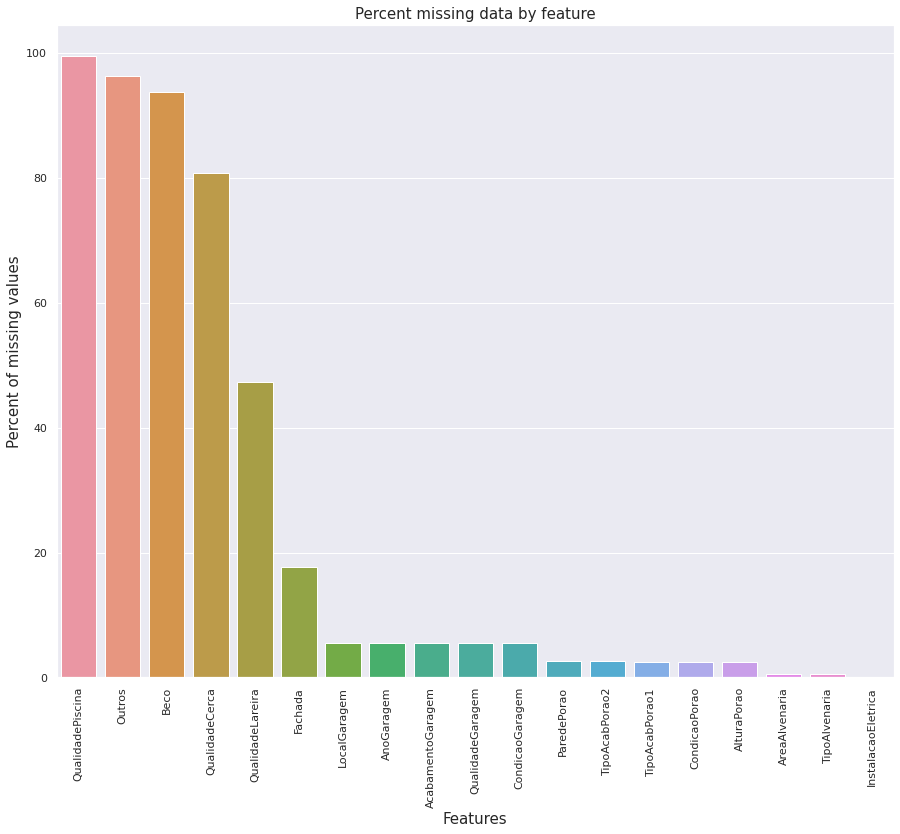

In [ ]:
# Plotaremos a porcentagem de valores nulos.

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null.index, y=null)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Lidando com valores nulos 

De acordo com a [documentação](https://drive.google.com/file/d/1B3AJBLhDSyNghSVrVnCIr0WudSwQqxBl/view):

* **QualidadePiscina**: NA significa **sem piscina**.
* **Outros**: NA significa **nenhum**.
* **Beco**: NA significa **sem acesso**.
* **QualidadeCerca**: NA significa **sem acesso**.
* **QualidadeLareira**: NA significa **sem lareira**.
* **Fachada**: Fachada é uma variável numérica, então nós iremos substituir os  valores nulos pela mediana.
* **LocalGaragem**: NA significa 'sem garagem'.
* **AnoGaragem**: NA significa 'sem garagem'.
* **AcabamentoGaragem**: NA significa 'sem garagem'.
* **QualidadeGaragem**: NA significa 'sem garagem'.
* **CondicaoGaragem**: NA significa 'sem garagem'.
* **paredeporao**: NA significa 'sem porao'.
* **TipoAcabPorao2**: NA significa 'sem porao'.
* **TipoAcabPorao1**: NA significa 'sem porao'.
* **CondicaoPorao**: NA significa 'sem porao'.
* **AlturaPorao**: NA significa 'sem porao'.
* **AreaAlvenaria**: AreaAlvenaria é uma variável numérica, então nós iremos substituir os valores nulos pela mediana.
* **TipoAlvenaria**: NA significa 'nenhum'.
* **InstalacaoEletrica**: Documentação não detalha o significado dos valores nulos, então nos usaremos nossa imaginação. 

In [ ]:
# Substitui os valores nulos das variáveis categoricas por 'None'

for col in ("QualidadePiscina", "Outros", "Beco", "QualidadeCerca", "QualidadeLareira", "LocalGaragem", "AcabamentoGaragem", "QualidadeGaragem", "CondicaoGaragem", "ParedePorao",
            "TipoAcabPorao2", "TipoAcabPorao1", "AlturaPorao", "TipoAlvenaria", "CondicaoPorao", ):
    df[col] = df[col].fillna("None")

# Lidando com os valores nulos das variáveis numéricas 
df['Fachada'] = df['Fachada'].fillna(df['Fachada'].median())
df['AnoGaragem'] = df['AnoGaragem'].fillna(0)
df['AreaAlvenaria'] = df['AreaAlvenaria'].fillna(df['AreaAlvenaria'].median())
df['InstalacaoEletrica'] = df['InstalacaoEletrica'].fillna('SBrkr')

In [ ]:
# Checando os valores nulos para conferir se realmente os valores nulos sumiram 
null = (df.isnull().sum() / len(df)) * 100
null = null.drop(null[null == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null})
missing_data.head(20)

,Missing Ratio


In [ ]:
# Aqui nós iremos mudar o dtype das nossas variáveis categiricas de 'objeto' para 'categorica'. Fazendo isso, nosso processo de regressão irá melhorar 
obj_vars = df.columns[df.dtypes == 'object']
for var in obj_vars:
  df[var] = df[var].astype('category')

### Diminuindo a assimetria e curtose

**Assimetria**

A assimetria mede essencialmente a simetria da distribuição, enquanto a curtose determina o peso das caudas da distribuição. A compreensão da forma dos dados é uma ação crucial que juda a entender onde está a maior parte das informações e a analisar os valores discrepantes em um determinado dado. 

A distribuição normal ajuda a conhecer uma assimetria. Quando falamos de distribuição normal, os dados são distribuídos simetricamente. A distribuição simétrica tem assimetria zero, pois todas as medidas de tendência central estão no meio. 


A distribuição normal pode ser vista abaixo:


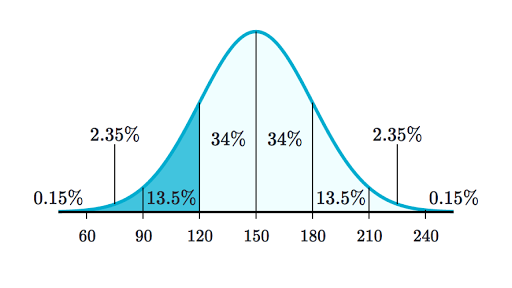

Quando os dados são distribuídos simetricamente, o lado esquerdo e o lado direito contêm o mesmo número de observações. Quando os dados não são simetricos temos uma distribuição com inclinação positiva ou negativa. Nessa distribuição, a média dos dados é maior que a mediana (um grande número de dados empurrados no lado direito), em outras palavras, os resultados são dobrados para o lado inferior, a média será maior que a mediana, pois a mediana é o valor médio e a moda é sempre o valor mais alto

A assimetria positiva extrema não é desejável para distribuição, pois um alto nível de assimetria pode causar resultados enganosos. Para distribuições positivamente assimétricas, a famosa transformação é a transformação logarítmica. A transformação de log propõe os cálculos do logaritmo natural para cada valor no conjunto de dados.

Já na assimetria negativa, a média dos dados é menor que a mediana (um grande número de dados empurrados no lado esquerdo). A distribuição negativamente enviesada é um tipo de distribuição em que a média, a mediana e a moda da distribuição são negativas em vez de positivas ou zero.

As distribuições descritas acima podem ser vistas na figura abaixo:



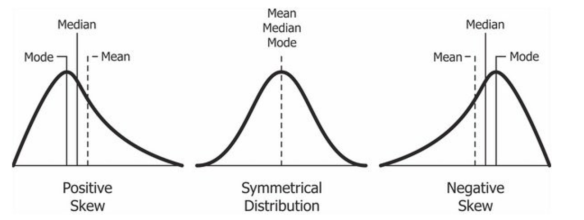

**Curtose** 

A curtose refere-se ao grau de presença de outliers na distribuição. Podemos explicar curtose de uma maneira ciência, porém essa definição é a que precisamos. 

Agora que nós conhecemos um pouco sobre assimetria e curtose, mãos a obra.

In [ ]:
# primeiramente iremos analisar a variavel dependente, que no nosso caso, é 'PrecoVenda'
df.PrecoVenda.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: PrecoVenda, dtype: float64

O valor minimo não é zero, o que é uma coisa boa.

In [ ]:
# Agora iremos descobrir qual é a assimetria e a curtose da nossa variável. 

print(f"Skewness: {df['PrecoVenda'].skew()}")
print(f"Kurtosis: {df['PrecoVenda'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


O próximo passo será plotar a distribuição da varável através do histograma. Utilizaremos também o qq-plot, quanto mais próximo os pontos estiverem da bissetriz do primeiro quadrante mais próximos os dados observados estão da distribuição considerada. O residplot será usado para sabermos como esta a variância da nossa variável dependente.

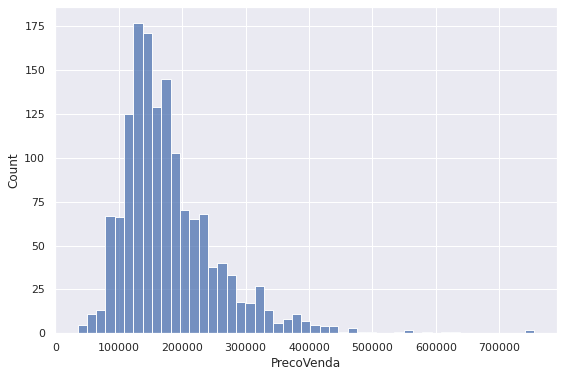

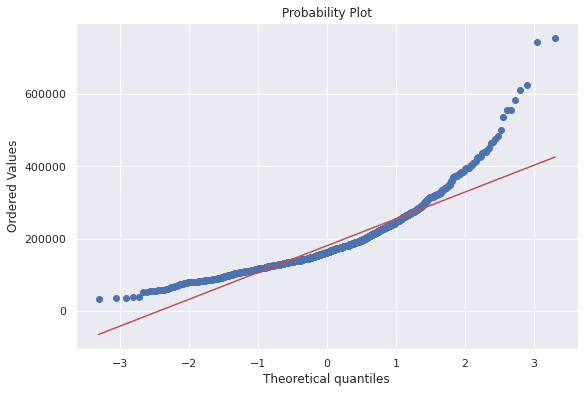

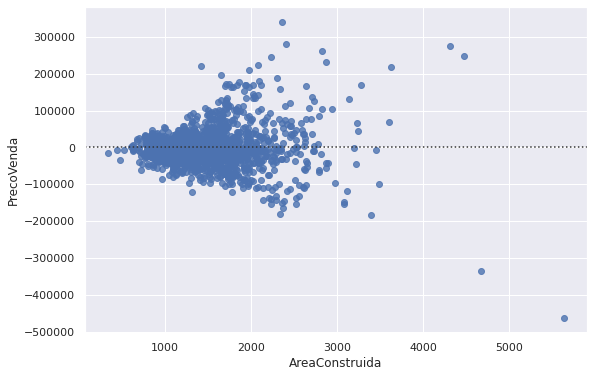

In [ ]:
# Histogrma, Q-Q plot e residplot

sns.set(rc={'figure.figsize':(9,6)}) # define o tamanho dos graficos do seaborn
sns.histplot(data = df.PrecoVenda)

fig = plt.figure()
res = scipy.stats.probplot(df['PrecoVenda'], plot=plt)
plt.show()

fig = plt.figure()
sns.residplot(data=df, x='AreaConstruida', y='PrecoVenda');
plt.show()

Através do histograma e do qq-plot, notamos que a variável de saída é positivamente assimétrica.

Já o residplot mostra que a variável alvo tem um nível de variância desigual. Isso é chamado de Heterocedasticidade (será explicado em breve) e é uma bandeira vermelha para o modelo de regressão linear múltipla.

Afim de diminuir a assimetria dos dados e melhorar a linearidade entre as variáveis independentes e a nossa variável 'PrecoVenda', nó utilizaremos uma transformação logaritmica

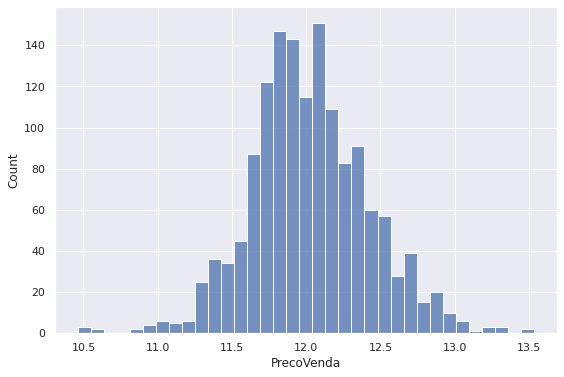

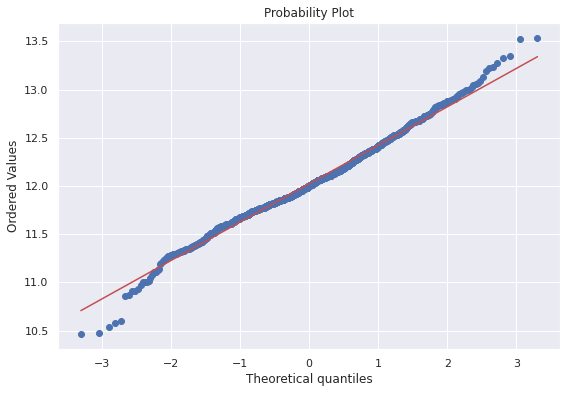

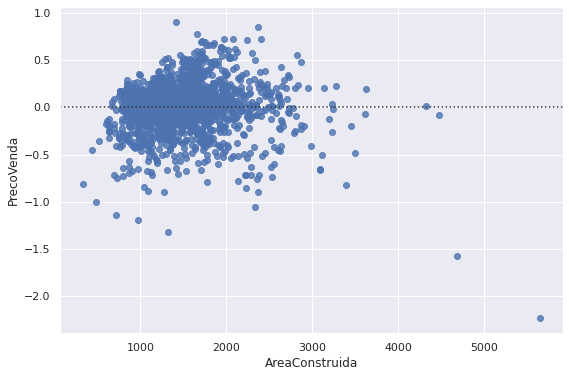

In [ ]:
# Aplica a transfoamação log

df['PrecoVenda'] = np.log1p(df['PrecoVenda']) 

sns.histplot(data = df.PrecoVenda)

fig = plt.figure()
res = scipy.stats.probplot(df['PrecoVenda'], plot=plt)
plt.show()

fig = plt.figure()
sns.residplot(data=df, x='AreaConstruida', y='PrecoVenda');
plt.show()

Agora a nossa distribuição está bem melhor, tem um aspecto normal e a nossa varância está melhor distribuída. Vamos olhar a assimetria e a curtose novamente

In [ ]:
print(f"Skewness: {df['PrecoVenda'].skew()}")
print(f"Kurtosis: {df['PrecoVenda'].kurt()}")

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


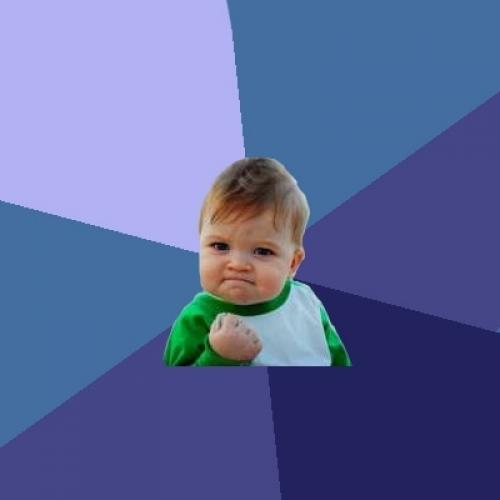

### Valores discrepantes 

Outliers, em português, valores discrepantes podem causar uma série de problemas, entre eles:

* Se os outliers forem distribuídos de forma não aleatória, eles podem diminuir a normalidade.
* Aumenta a variância do erro e reduz o poder dos testes estatísticos.
* Causam viés e/ou influenciar as estimativas.
* Podem impactar a suposição básica de regressão, bem como outros modelos estatísticos.

Devemos ter muito cuidado ao lidar com outliers, por isso ao invés de realizar sua exclusão do dataset, nós iremos trata-los.

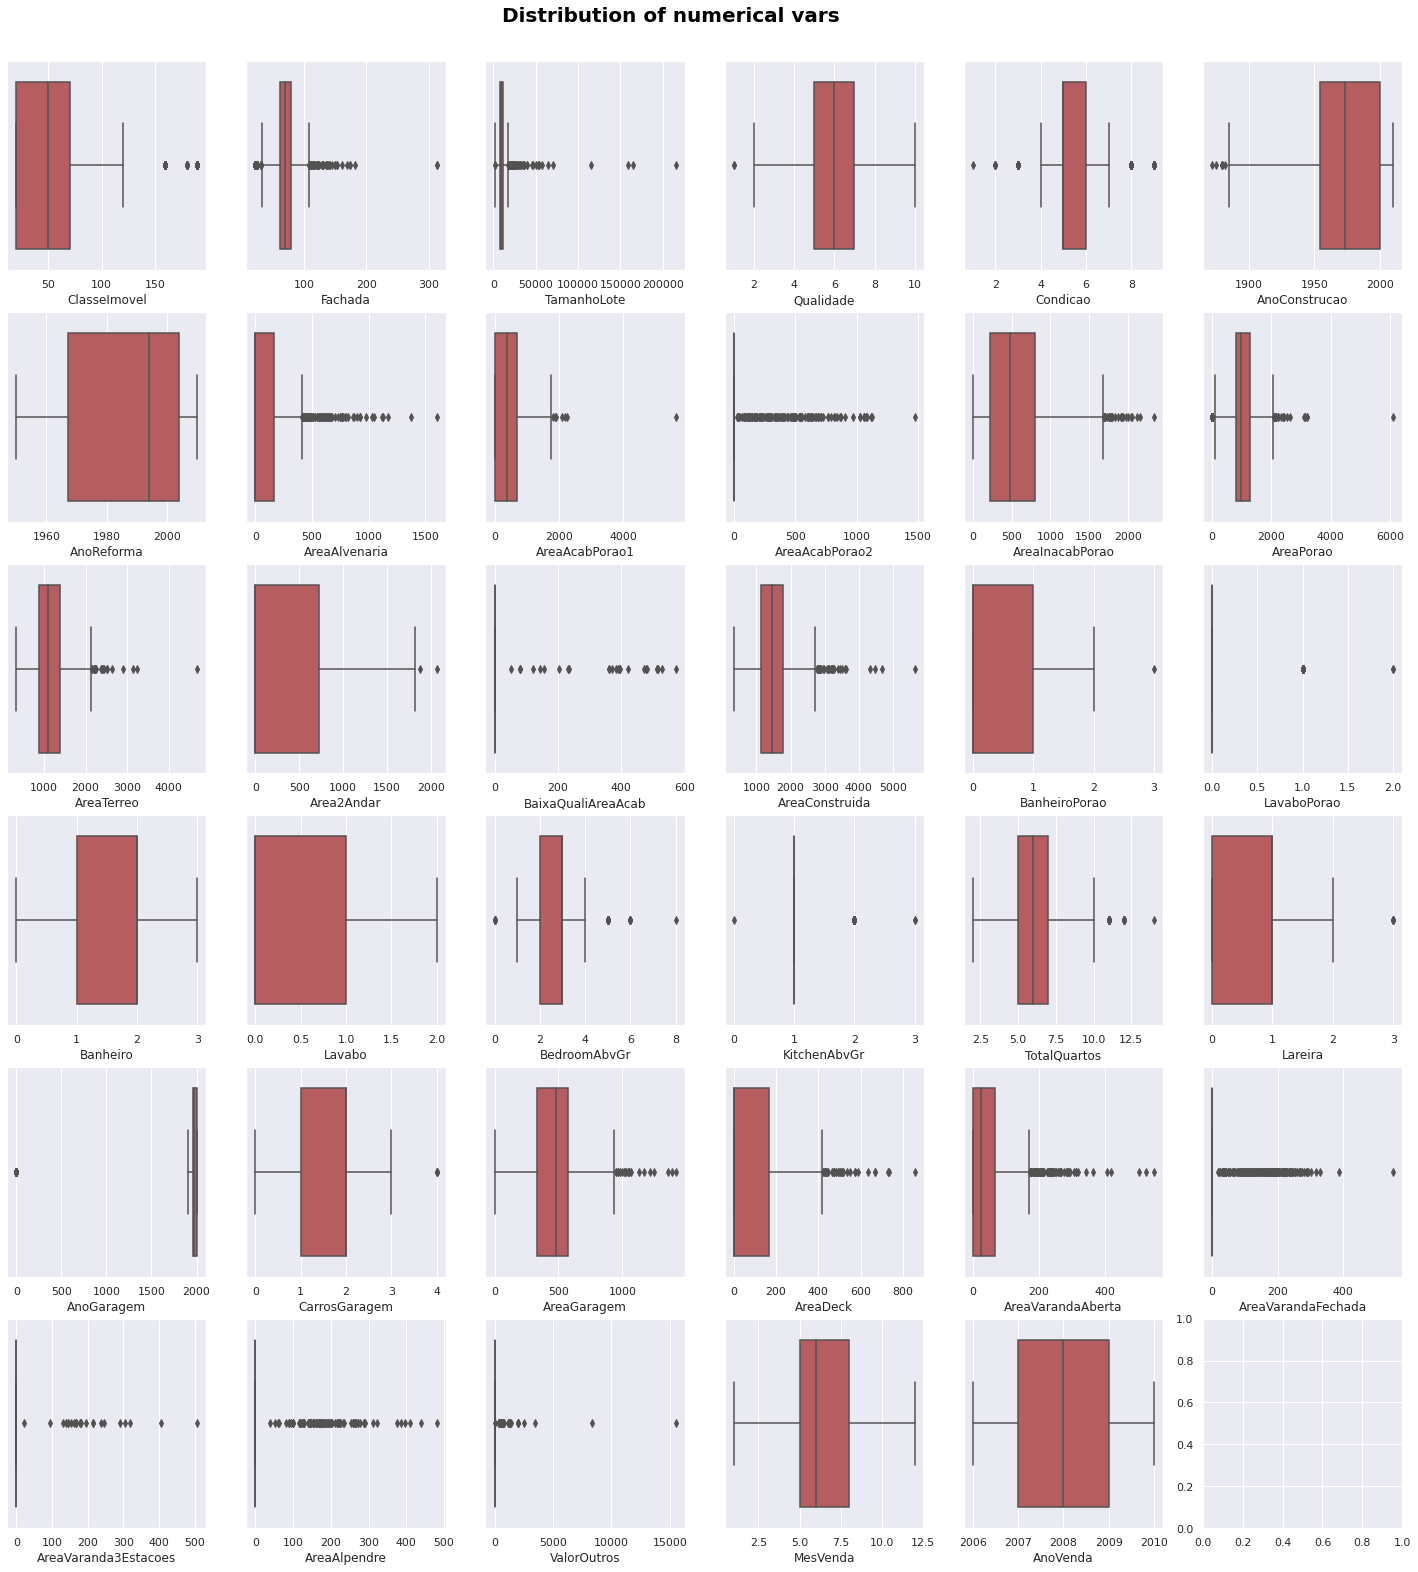

In [ ]:
# Primeiramente iremos plotar as varáveis numéricas em uma sequância de boxplots 

y = df.PrecoVenda # Criamos a variavel 'y', nossa varável alvo
df.drop(['PrecoVenda', 'Id', 'AreaPiscina', 'QualidadePiscina'], inplace=True, axis=1)

# Chamaremos a função 'plot'
plot_bar(df)

In [ ]:
# Nós vamos remover os outliers usando oa quartis das colunas numéricas 
num_vars = df.columns[df.dtypes != 'category']
for col in df[num_vars].columns:
    percentiles = df[col].quantile([0.01, 0.99]).values # define os quartis de cada coluna 
    df[col] = np.clip(df[col], percentiles[0], percentiles[1]) # np.clip substitui os valores acima ou abaixo dos quartis pelos próprios quartis 

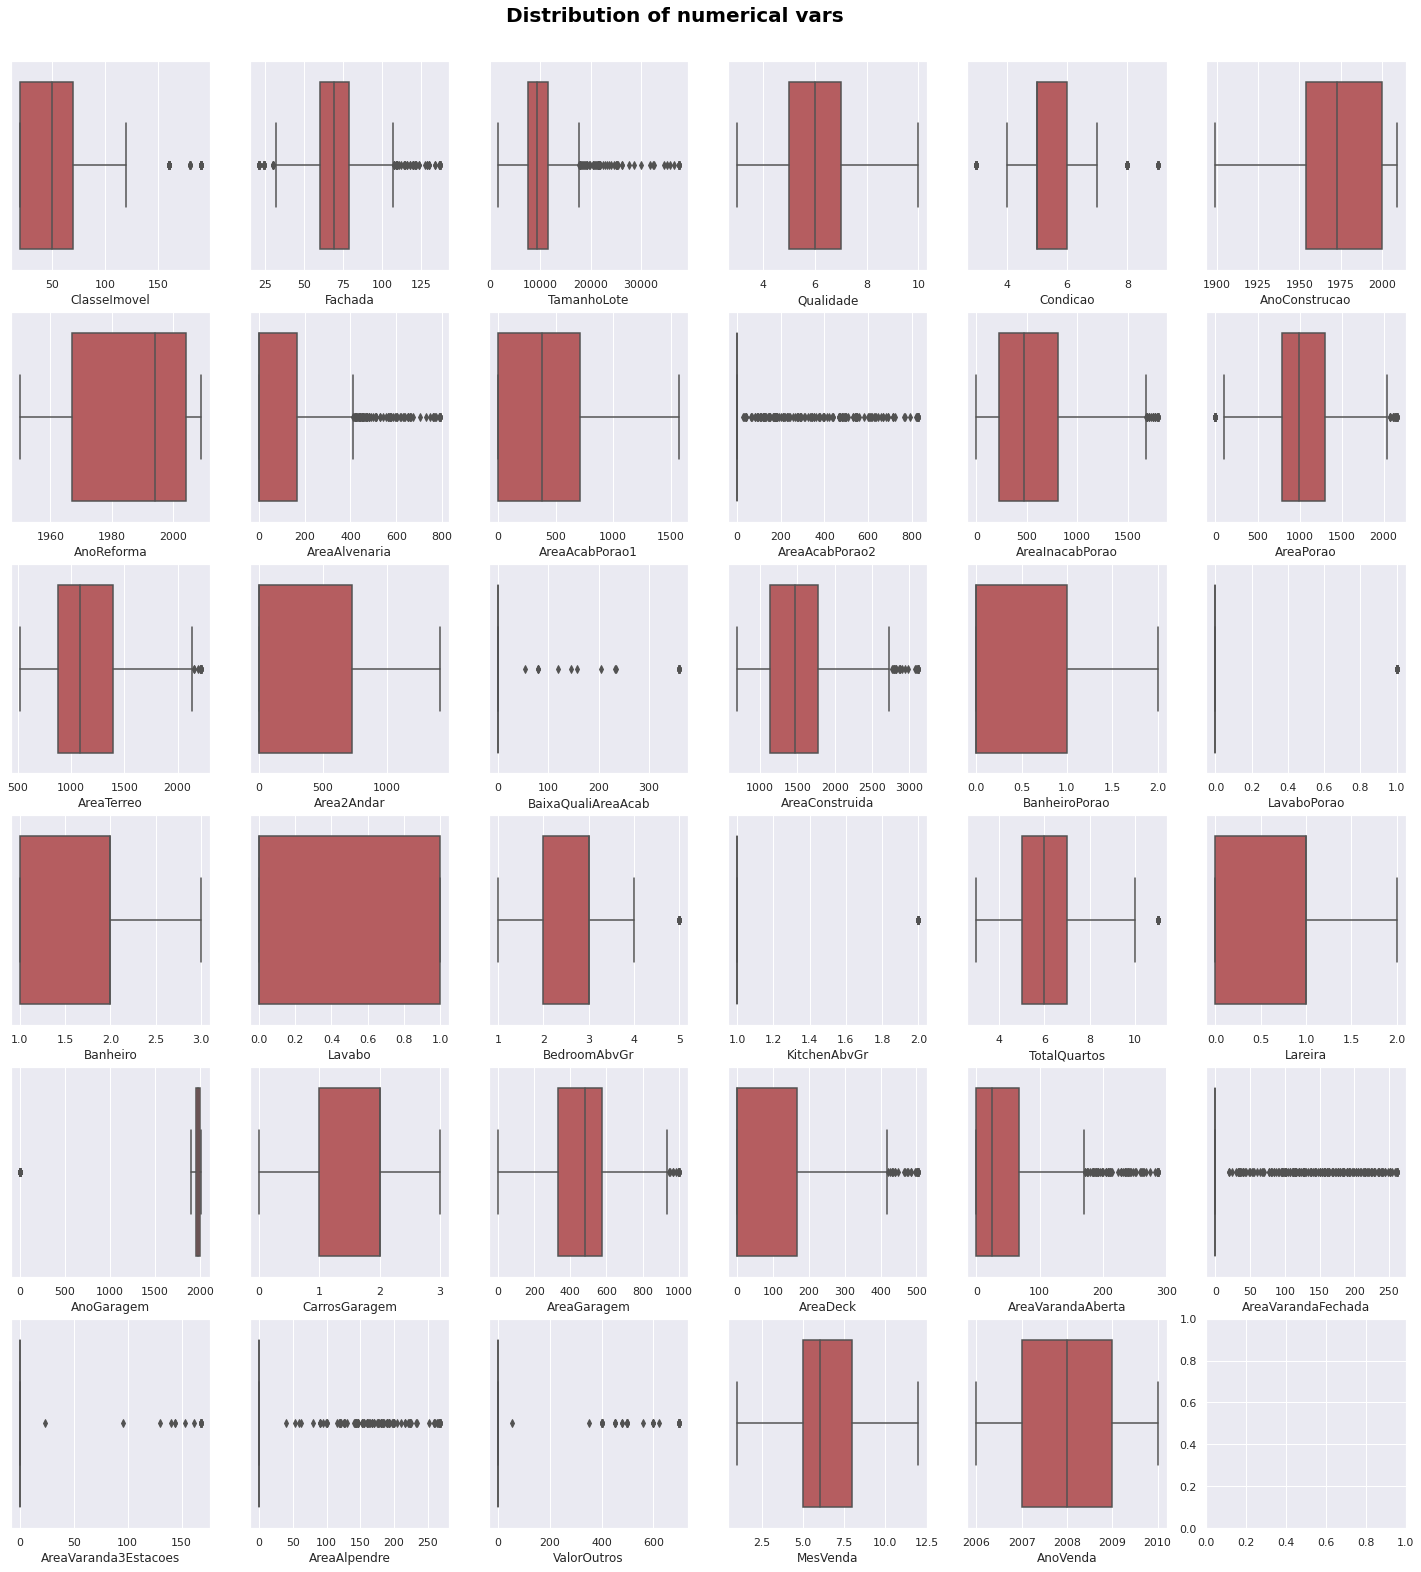

In [ ]:
# Iremos agora ver o que aconteceu com os outliers 
plot_bar(df)

Nós podemos ver que os valores extremos sumiram. Poderiamos ter alterado o limite dos quartis para 0.1 e 0.9 respectivamente, entretanto existem algumas váriaveis, como Areaalpendre, que são composta exclusivamente por outliers. Tais variáveis seriam completamente elinadas, por isso utilizei um limite mais alto.

### O que é necessário em uma regressão linear
* Linearidade
* Heterocedasticidade e homocedasticidade
* Independência de erros 
* Normalidade multivariada
* Com pouca ou nenhuma multicolinearidade

Ao ajustar um modelo linear, assumimos que a relação entre as variáveis são lineares e os erros, ou resíduos, são flutuações aleatórias puras em torno da linha verdadeira. Esperamos que a variabilidade na variável resposta(dependente) não aumente à medida que o valor do preditor(independente) aumenta, está é a definição de variância constante, também conhecida como **Homoscedasticidade**. Também assumimos que as observações são independentes umas das outras (sem **Multicolinearidade**).

Os problemas geralmente aparecem todos juntos, se observarmos uma dessas suposições no conjunto de dados, é provável que possamos nos deparar com outras já mencionadas, teremos que corrigi-lo. Vamos ao trabalho.

**Linearidade**


Uma regressão linear precisa que a relação entre cada variável independente e a variável dependente seja linear. A linearidade pode ser vista com gráficos de dispersão, onde nenhuma ou pouca linearidade está presente.

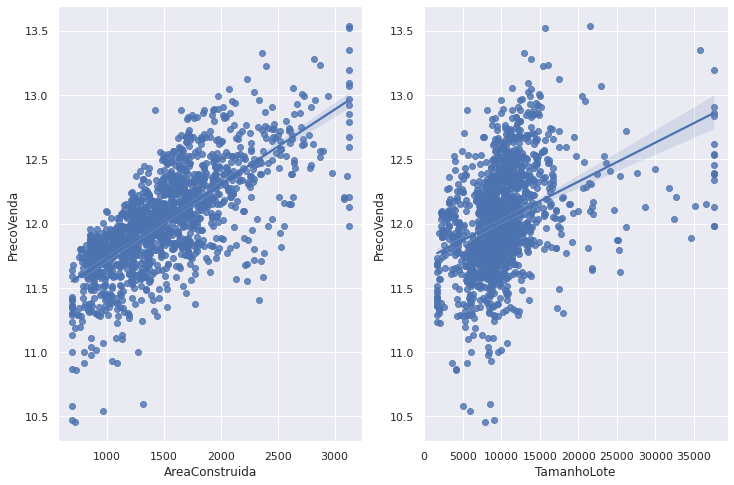

In [ ]:
# Tamanho do gráfico
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2)

## Putting a regression line. 
sns.regplot(x=df.AreaConstruida, y=y, ax=ax1)

## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=df.TamanhoLote, y=y, ax=ax2);

Estamos plotando nossa variável alvo com duas variáveis ​​independentes **AreaConstruida** e **TamanhaLote**. Podemos ver no gráfico que há uma relação linear melhor entre **PrecoVenda** e **AreaConstruida** do que **PrecoVenda** e **TamanhoLote**.

O gráfico de resíduos para a variável "AreaConstruida" já foi plotado. Podemos notar que ao aplicar a transformada log1p na variável "PrecoVenda", o gráfico perde sua forma cônica e apresenta o conceito de Homocedasticidade (quase uma quantidade igual de variância nas linhas zero), o oposto é Hemoscedasticidade.

**Normalidade Multivariada**: A análise de regressão linear requer que a variável dependente seja normalmente distribuída. Utilizando um histograma, box plot ou Q-Q-Plot pode-se verificar se a variável de destino é normalmente distribuída. Com um teste de Kolmogorov-Smirnov conseguimos verificar a normalidade na variável dependente. Já sabemos que nossa variável de destino não seguiu uma distribuição normal, por isso usamos a transformação log1p.



**Nenhuma ou Pouca multicolinearidade**: A multicolinearidade ocorre quando as variáveis ​​independentes em um modelo de regressão são correlacionadas. Se o grau de correlação entre as variáveis ​​for alto o suficiente, pode causar problemas ao ajustar o modelo e interpretar os resultados. As estimativas de coeficiente podem oscilar muito com base em quais outras variáveis ​​independentes estão no modelo, tornando os coeficientes muito sensíveis a pequenas mudanças no modelo.

Reduzindo a precisão dos coeficientes, o poder estatístico do seu modelo de regressão enfraquece, você pode não ser capaz de confiar nos valores de p para identificar variáveis ​​independentes que são estatisticamente significativas.
Podemos verificar a multicolinearidade usando um mapa de calor (ferramenta excelente).

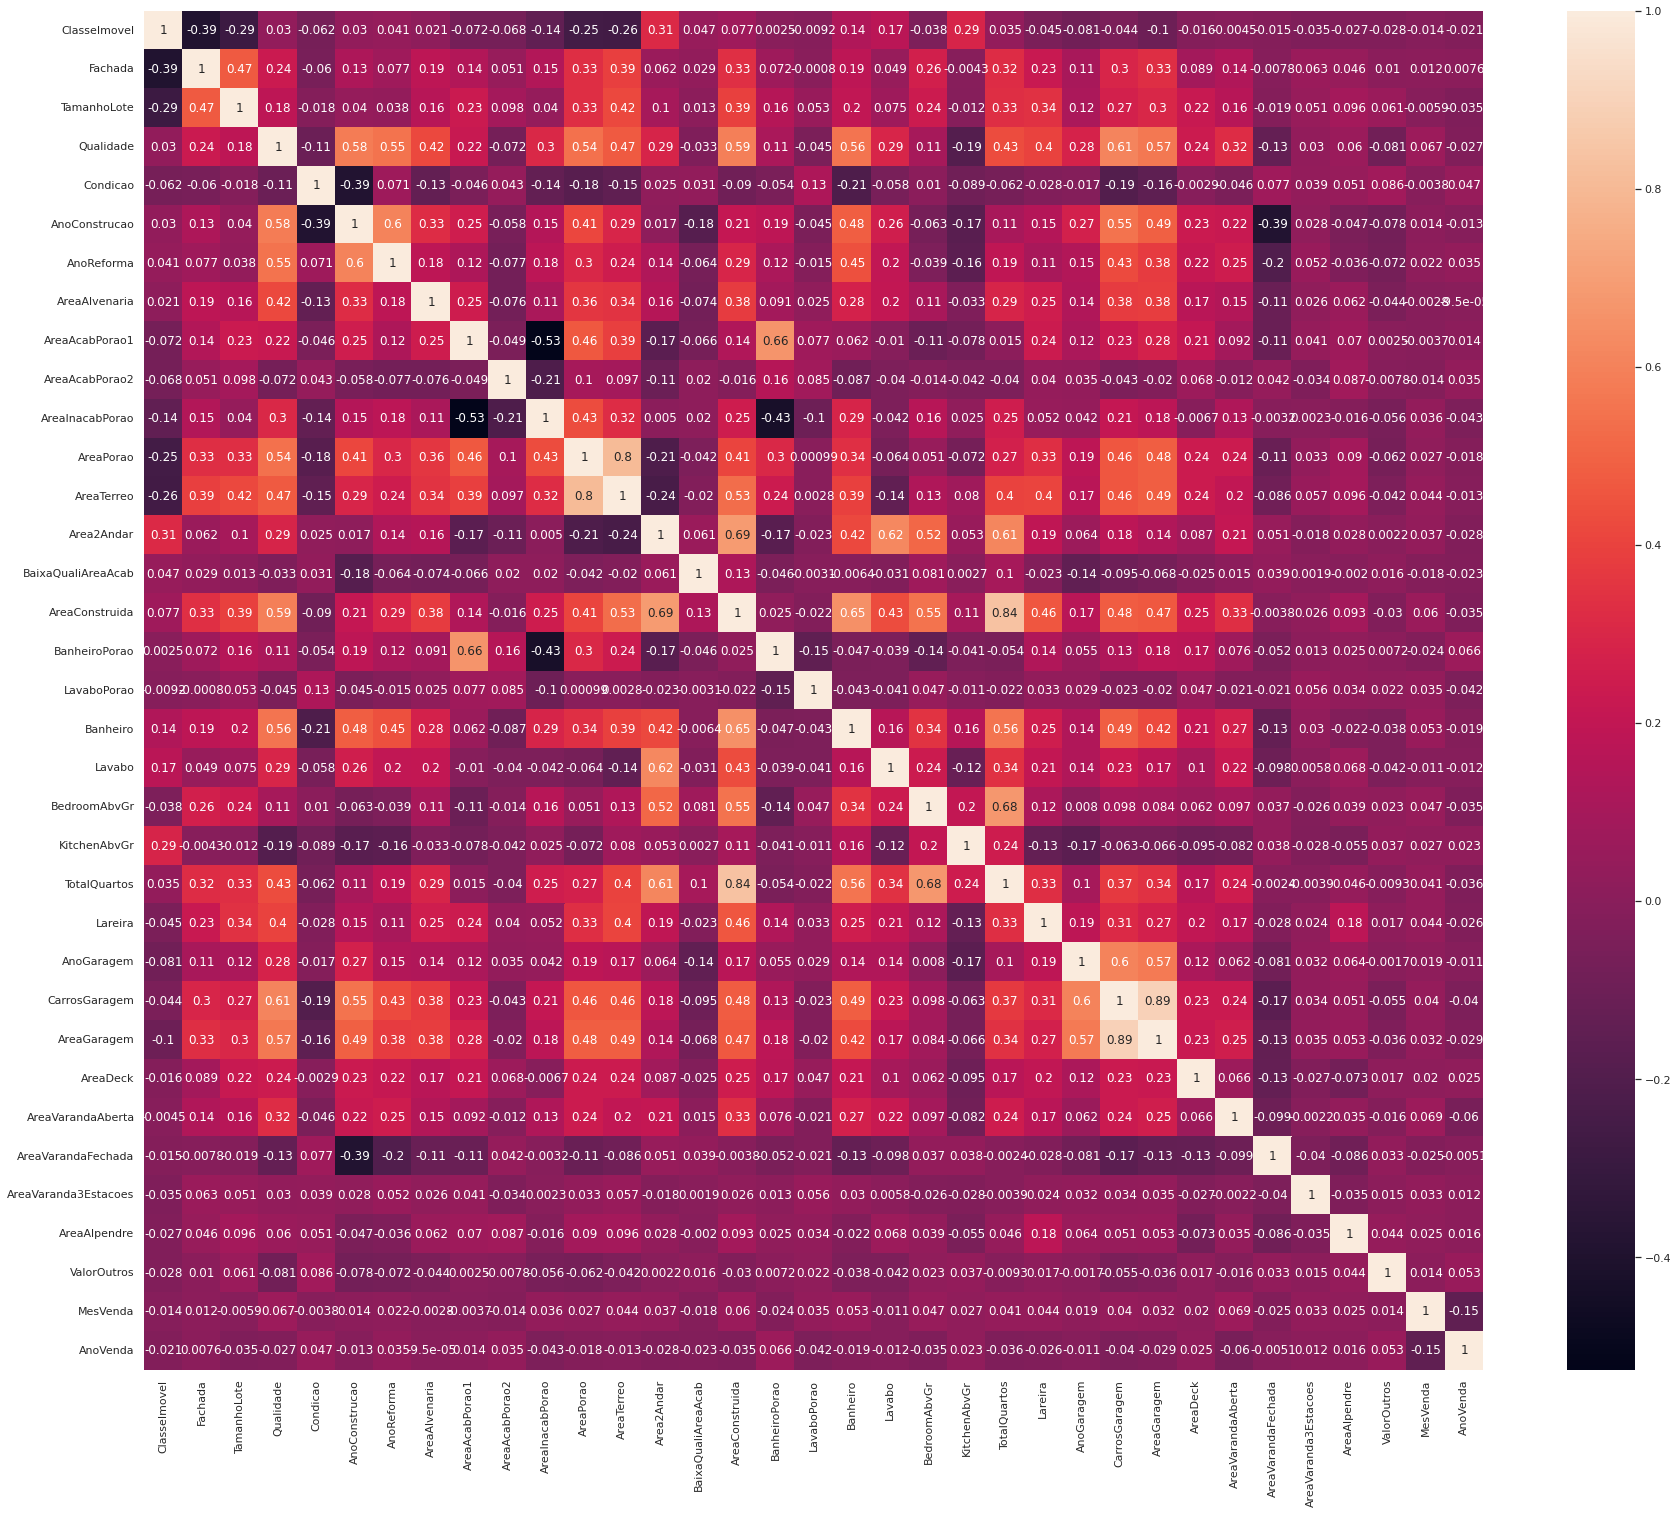

In [ ]:
plt.subplots(figsize = (30,25))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr().unstack().drop_duplicates().sort_values(ascending=False)[:5]

ClasseImovel    ClasseImovel      1.000000
CarrosGaragem   AreaGaragem       0.892964
AreaConstruida  TotalQuartos      0.836481
AreaPorao       AreaTerreo        0.803791
Area2Andar      AreaConstruida    0.689593
dtype: float64

Nós iremos considerar uma correlação acima de 80% como 'alta'. O correto quando temos duas variáveis altamente correlacionada é deletar uma das variáveis e manter somente uma. Entretanto, nós iremos utilizar o 'robustscaler' quando formos realizar a regressão, por este motivo, nós iremos manter estas variáveis. 


### Consertando assimetria no dataset

In [ ]:
# Primeiramente iremos descobrir as variáveis com maior assimetria no dataset 

num_features = df.dtypes[df.dtypes != "category"].index

# variáveis com mais assimetria
skewed_features = df[num_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)

,Skew
BaixaQualiAreaAcab,8.463101
AreaVaranda3Estacoes,7.895363
ValorOutros,5.460009
KitchenAbvGr,4.344873
LavaboPorao,3.859402
AreaAcabPorao2,3.738267
AreaAlpendre,3.609640
AreaVarandaFechada,2.746672
TamanhoLote,2.451671
AreaAlvenaria,2.036196


Vamos a distribuição destas variaveis 

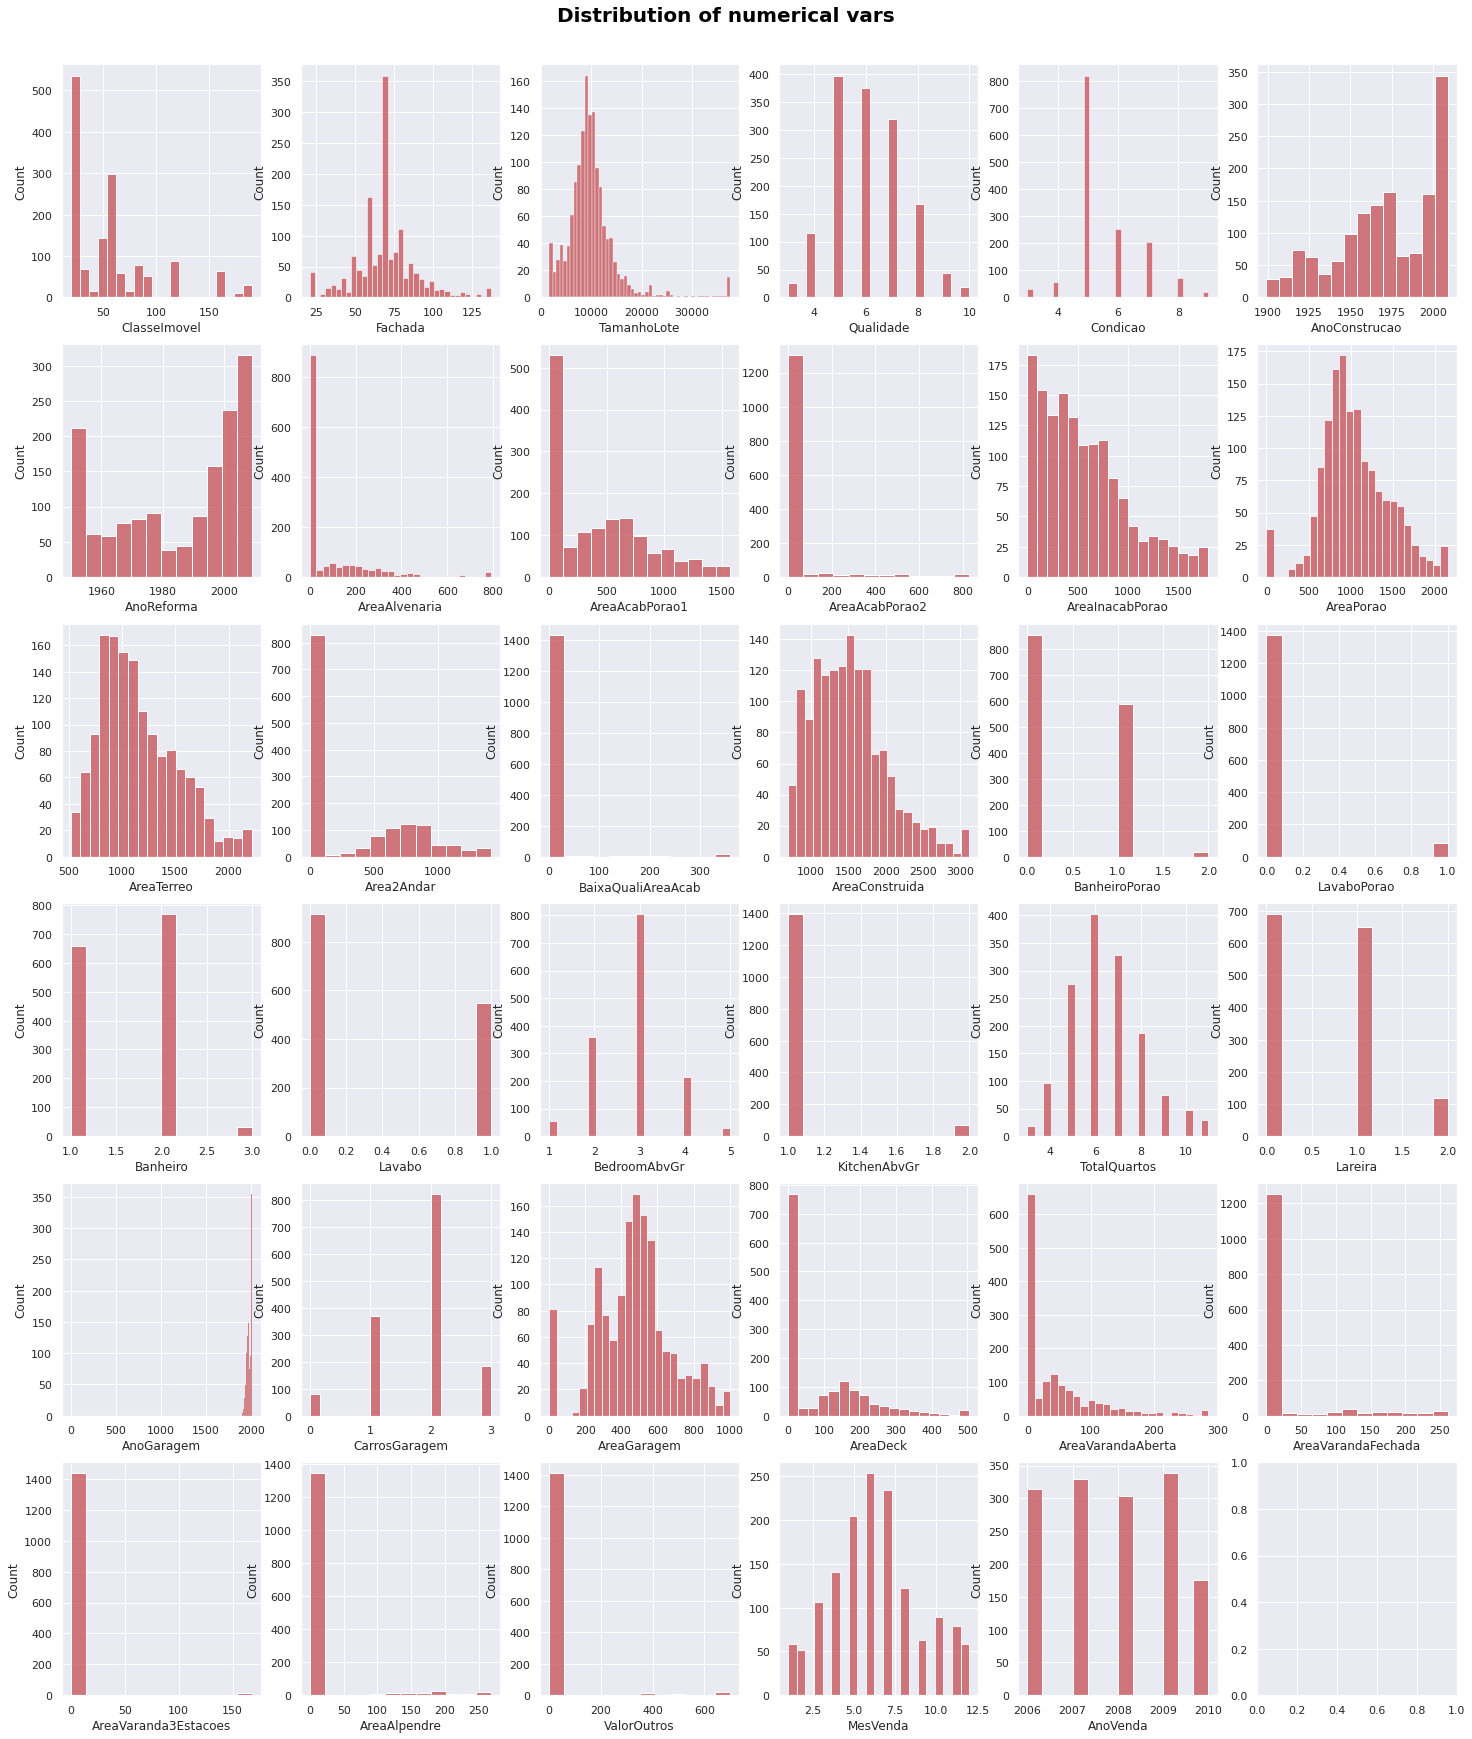

In [ ]:
plot_hist(df)

### Transformação de Box cox 
Uma transformação Box cox é definida como uma maneira de transformar variáveis ​​dependentes não normais para uma forma normal. 

Mais informações [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

In [ ]:
# Utilizaremos boxcox1p porque ela funciona em números negativos 
from scipy.special import boxcox1p

skewness = skewness[abs(skewness) > 0.75]
print(f"Existem {skewness.shape[0]} variáveis numéricas assimétricas para serem transformadas")

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

Existem 35 variáveis numéricas assimétricas para serem transformadas


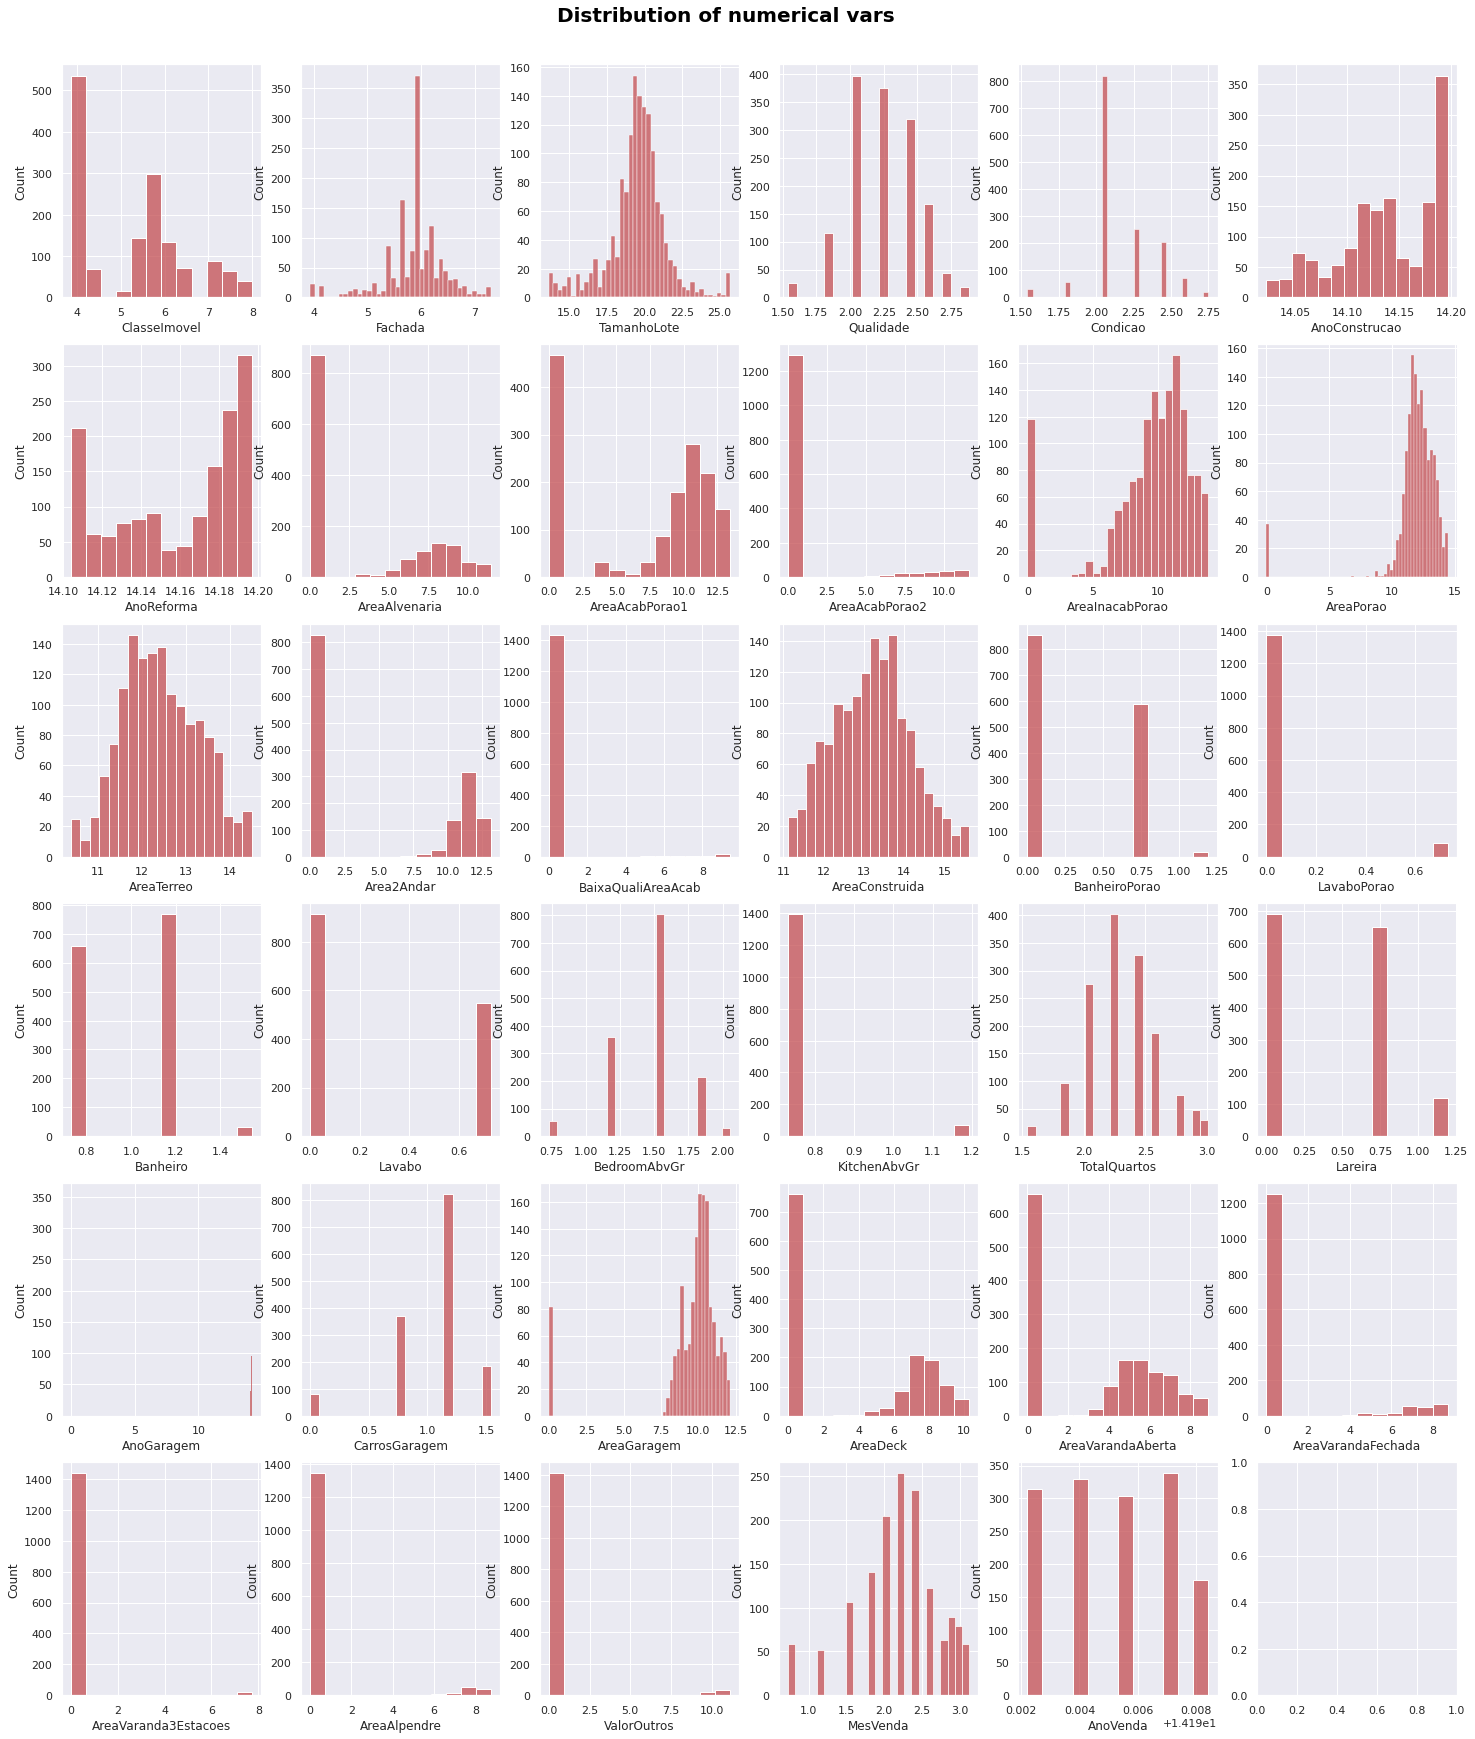

In [ ]:
plot_hist(df)

Não está perfeito, entretanto algumas variáveis possuem uma distribuição mais normal. 

### Criando novas features

Os modelos de ML têm problemas para reconhecer padrões mais complexos, por isso vamos ajudar nossos modelos criando novos recursos com base no conjunto de dados.

In [ ]:
df['VarandaTotal'] = (df['AreaVarandaAberta'] + df['AreaVarandaFechada'] + df['AreaDeck'] + df['AreaVaranda3Estacoes'] + df['AreaAlpendre'])
df['AreaTotal'] = (df['AreaTerreo'] + df['Area2Andar'] + df['BaixaQualiAreaAcab'] + df['AreaConstruida'])
df['TemLareira'] = df['Lareira'].apply(lambda x: 1 if x > 0 else 0)
df['TemGaragem'] = df['AreaGaragem'].apply(lambda x: 1 if x > 0 else 0)
df['TotalBanheiros'] = (df['BanheiroPorao'] + df['Banheiro'])

## Features mais importantes e regressão OLS

Para achar as features mais importantes nós utilizaremos Ridge e Lasso

### Regressão ridge

Mais informações sobre o Ridge [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

In [ ]:
# Para achar as features nós utilizaremos uma cópia do dataset pois o original será usado depois 

df_copy = df.copy() 
y_copy = y.values

O próximo passo é codificar as variáveis categóricas, para isso utilizaremos OrdinalEncoder.

OrdinalEncoder atribui um número para classe contida em uma feature categorica. Exemplificando, caso tivessemos uma coluna chamada 'gênero', os dados contidos nessa coluna seriam 'homem' e 'mulher', com o OrdinalEncoder, seria atribuido 0 para o homem e 1 para mulher. Isto é uma vantagem quando comparamos com o OneHotEncoder, pois temos um número bem menor de colunas. 

Mais informações sobre o OrdinalEncoder [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [ ]:
# Importar o ordinal encoder 
from sklearn.preprocessing import OrdinalEncoder

cat_vars = df_copy.columns[df_copy.dtypes == 'category'] # código para saber as variaveis categoricas

enc = OrdinalEncoder()
df1 = pd.DataFrame(enc.fit_transform(df_copy[cat_vars]))

In [ ]:
# Ordinal Encoder remove as colunas do dataset, vamos traze-las de volta
df_copy[cat_vars] = df1

In [ ]:
# Vamos dividir o dataset em train e test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_copy, y_copy, random_state=29)

In [ ]:
# Antes de realizar a regressão ridge, vamos padronizar os dados

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9155485254125333
model score on testing data: 0.8538441367246722


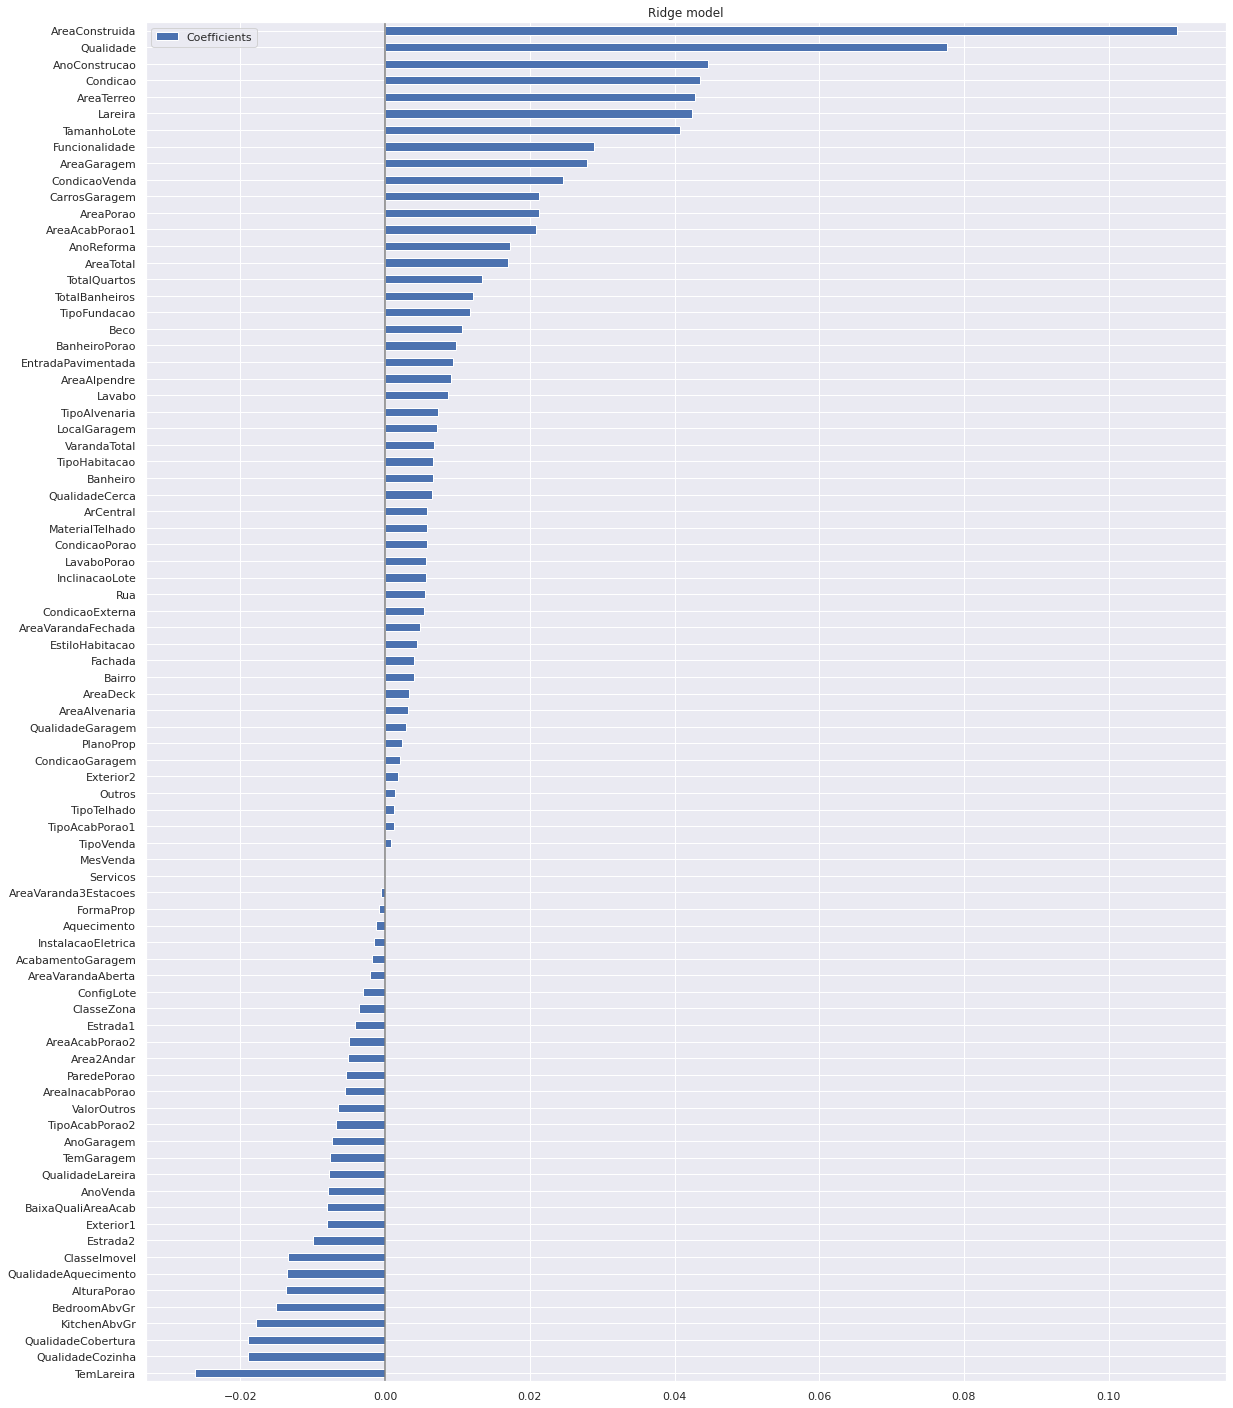

In [ ]:
# Vamos ver as features mais importantes

coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs = coefs.sort_values(by='Coefficients', ascending=True)
coefs.plot(kind='barh', figsize=(25, 25))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Mais sobre OLS [aqui](https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols)

In [ ]:
import scipy
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import shapiro
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white


df_copy['PrecoVenda'] = y_copy
modelo = smf.ols(formula = 'PrecoVenda ~ AreaConstruida + Qualidade + AnoConstrucao + Condicao + AreaTerreo + TamanhoLote', data = df_copy)
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1430.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:22:54   Log-Likelihood:                 679.38
No. Observations:                1460   AIC:                            -1345.
Df Residuals:                    1453   BIC:                            -1308.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -32.6445      1.632    -20.

Agora nós iremos ver se o nosso modelo possui uma sáida que se parece com uma distribuição normal

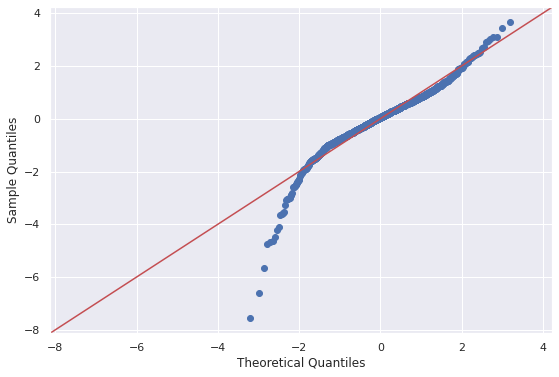

In [ ]:
modelo_residuo = modelo_fit.resid
modelo_y_ajustado = modelo_fit.fittedvalues
sm.qqplot(modelo_residuo, line="45", fit=True,dist=stats.norm)
plt.show()

Nossa saída não parece gaussiana, pra desencargo de consciência, faremos um teste de Shapira-Wilk

In [ ]:
#Teste Shapiro-Wilk
stat, p = shapiro(modelo_residuo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:print('Amostra parece gaussiana (falhamos em rejeitas H0)')
else:print('Amostra parece gaussiana (rejeita H0)')


Statistics=0.934, p=0.000
Amostra parece gaussiana (rejeita H0)


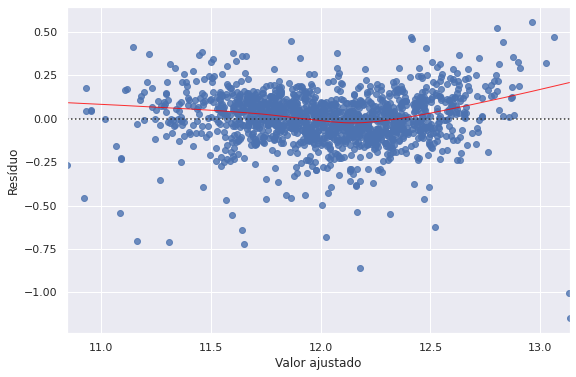

In [ ]:
sns.residplot(modelo_y_ajustado, modelo_residuo, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()


In [ ]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white


O próximo passo é realizar três testes para saber se a nossa saída possui variância constante. 

In [ ]:
#Breush-Pagan test:
name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(modelo_residuo, modelo_fit.model.exog)
print(lzip(name, test))
print()
#Goldfeld-Quandt test
name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(modelo_residuo, modelo_fit.model.exog)
print(lzip(name, test))
print()
#White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(modelo_residuo, modelo_fit.model.exog)
print(lzip(name, test))
print()


[('Breusch pagan statistic', 53.961789597518155), ('p-value', 7.509202629093538e-10)]

[('Goldfeld-Quandt - statistic', 0.9859874520653478), ('p-value', 0.575210376657573)]

[('White’s statistic', 189.66725992359338), ('p-value', 2.2582923030348083e-26)]



Nossa saída possui heterocedasticidade, ou seja, variância não é constante. 

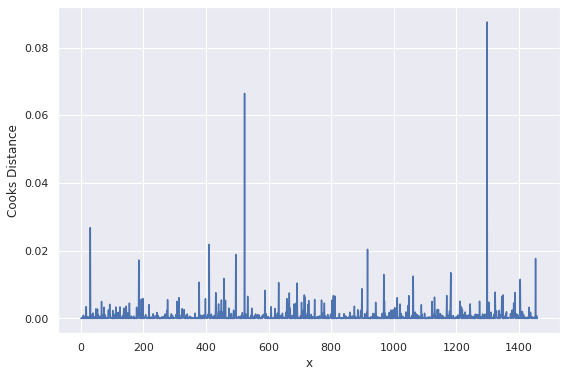

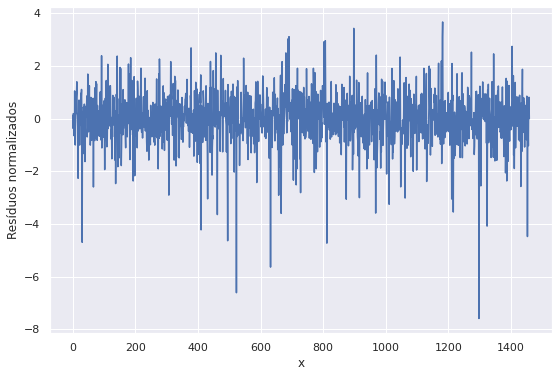

In [ ]:
# Vamos remover os valores discrepantes para ver se melhora 

from statsmodels.graphics.regressionplots import *

influence = modelo_fit.get_influence()
cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

print('\n\n')

student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel('x')
plt.ylabel('Resíduos normalizados')
plt.show()

In [ ]:
# Localiza os outliers
drop = np.where(student_resid < -3)
drop1 = np.where(student_resid > 3)

# Salvamos os valores 
drop = df_copy.iloc[drop].index
drop1 = df_copy.iloc[drop1].index

# Dropamos 
df_copy.drop(drop, axis=0, inplace=True)
df_copy.drop(drop1, axis=0, inplace=True)

Agora que os valores discrepantes foram removidos, faremos a regressão novamente .

In [ ]:
X = df_copy[['AreaConstruida', 'Qualidade', 'AnoConstrucao', 'Condicao', 'AreaTerreo', 'TamanhoLote']]
X = sm.add_constant(X)

y_copy = df_copy['PrecoVenda']

X_train, X_test, y_train, y_test = train_test_split(X, y_copy, test_size=0.2, random_state=2)
model = sm.OLS(y_train, X_train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1489.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:22:55   Log-Likelihood:                 701.14
No. Observations:                1148   AIC:                            -1388.
Df Residuals:                    1141   BIC:                            -1353.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -30.5177      1.573    -19.

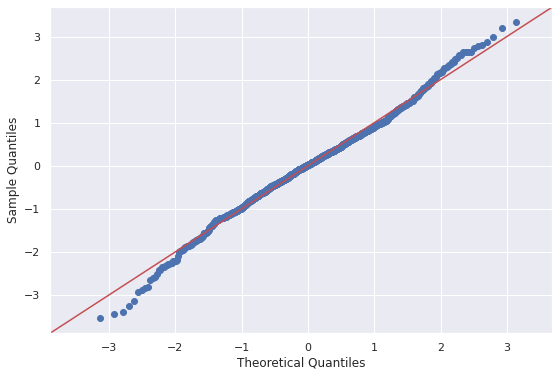

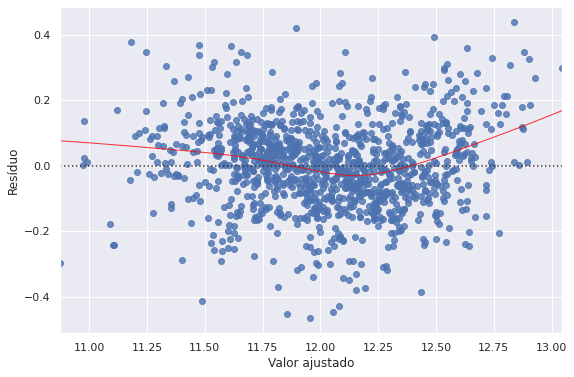

In [ ]:
modelo_residuo = model.resid
modelo_y_ajustado = model.fittedvalues
sm.qqplot(modelo_residuo, line="45", fit=True,dist=stats.norm)
plt.show()

print('\n\n')

sns.residplot(modelo_y_ajustado, modelo_residuo, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

O modelo apresenta uma melhora significativa 

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ypred = model.predict(X_test)

#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred)) # Não esquecer que os dados sofreram transformações logaritmicas e box cox

(0.8801966892280699, 0.09177783298605775, 0.11994701469385183)

### Regressão Lasso


Grosseiramente falando, a diferença entre Ridge e Lasso é que lasso exclui as features que ele considera insignificantes para o modelo.

Mais informações [aqui](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b).

In [ ]:
# O processo é o mesmo dos passos anteriores, porém todos contidos em uma mesma célula 

from sklearn.linear_model import Lasso

df_lasso = df.copy() 
y_lasso = y.values

cat_vars = df_lasso.columns[df_lasso.dtypes == 'category'] 

enc = OrdinalEncoder()
df1 = pd.DataFrame(enc.fit_transform(df_lasso[cat_vars]))

df_lasso[cat_vars] = df1

X_train, X_test, y_train, y_test = train_test_split(df_lasso, y_lasso, random_state=29)

model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.8972020341253953
model score on testing data: 0.8514625440677748


O score é menor pois algumas features são eliminadas.  

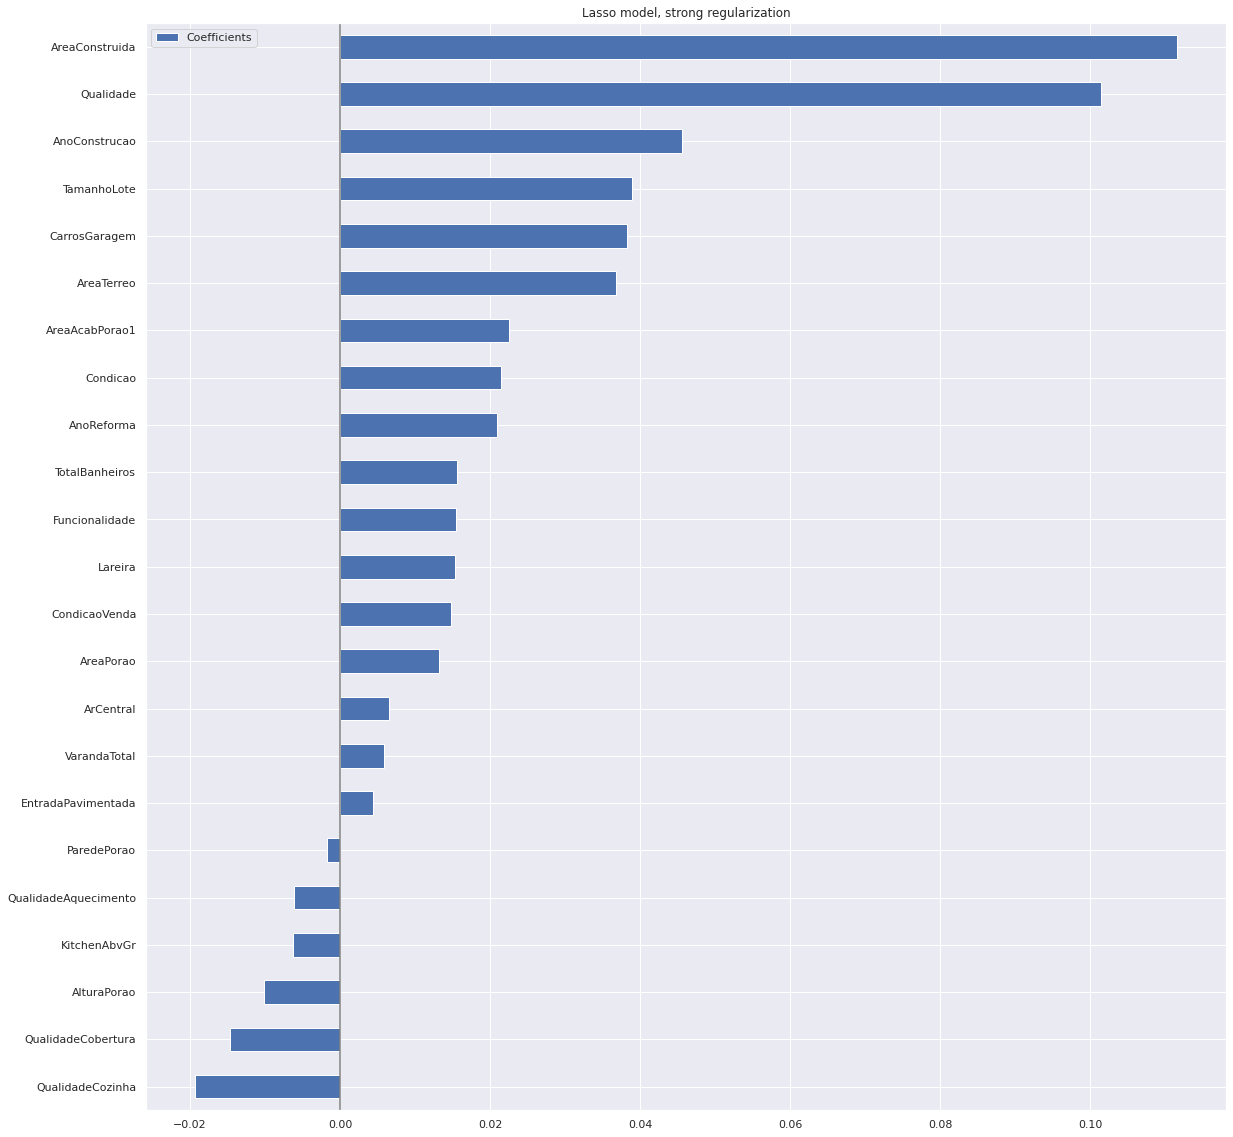

In [ ]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs = coefs[coefs.Coefficients !=0].sort_values(by='Coefficients', ascending=True) # Sort the values and eliminate the features that were zeroed out
coefs.plot(kind='barh', figsize=(25, 20))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Como podemos notar, o número de features é menor. Caso quisessemos dar continuidade a análise, é somente necessário seguir os passos usados na regressão ridge.

In [ ]:
df_lasso['PrecoVenda'] = y_lasso
modelo = smf.ols(formula = 'PrecoVenda ~ AreaConstruida + Qualidade + AnoConstrucao + TamanhoLote + CarrosGaragem + AreaTerreo', data = df_copy)
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1571.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:22:57   Log-Likelihood:                 800.14
No. Observations:                1436   AIC:                            -1586.
Df Residuals:                    1429   BIC:                            -1549.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.5256      1.453    -12.

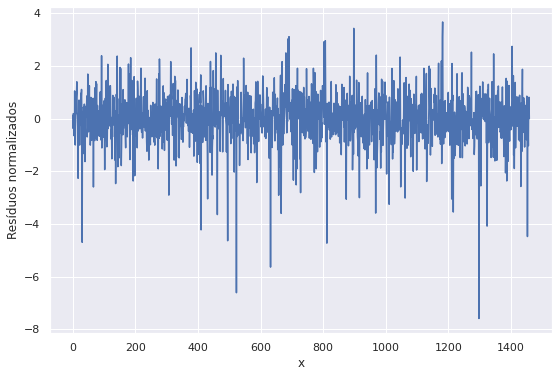

In [ ]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel('x')
plt.ylabel('Resíduos normalizados')
plt.show()

In [ ]:
# Localiza os outliers
drop = np.where(student_resid < -3)
drop1 = np.where(student_resid > 3)

# Salvamos os valores 
drop = df_lasso.iloc[drop].index
drop1 = df_lasso.iloc[drop1].index

# Dropamos 
df_lasso.drop(drop, axis=0, inplace=True)
df_lasso.drop(drop1, axis=0, inplace=True)

In [ ]:
X = df_lasso[['AreaConstruida', 'Qualidade', 'AnoConstrucao', 'Condicao', 'AreaTerreo', 'TamanhoLote']]
X = sm.add_constant(X)

y_lasso = df_lasso['PrecoVenda']

X_train, X_test, y_train, y_test = train_test_split(X, y_lasso, test_size=0.2, random_state=2)
model = sm.OLS(y_train, X_train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1489.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:22:58   Log-Likelihood:                 701.14
No. Observations:                1148   AIC:                            -1388.
Df Residuals:                    1141   BIC:                            -1353.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -30.5177      1.573    -19.

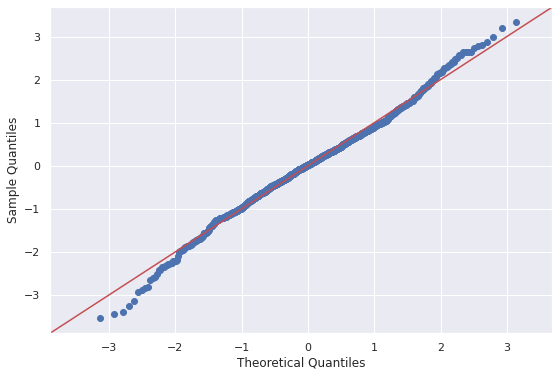

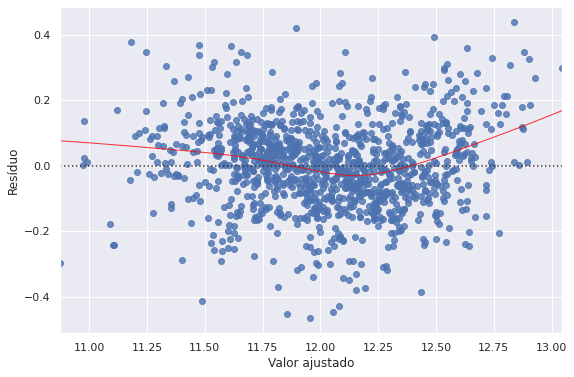

In [ ]:
modelo_residuo = model.resid
modelo_y_ajustado = model.fittedvalues
sm.qqplot(modelo_residuo, line="45", fit=True,dist=stats.norm)
plt.show()

print('\n\n')

sns.residplot(modelo_y_ajustado, modelo_residuo, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

As duas formas deram bem parecidas, cabe a nós decidir qual delas melhor se adapta ao modelo que estamos usando.

## Stacking

Stacking usa um algoritmo de meta-aprendizagem para aprender a melhor combinar as previsões de dois ou mais algoritmos básicos de aprendizado de máquina. O benefício de fazer um 'stacking' é que ele pode aproveitar os recursos de uma variedade de modelos de bom desempenho em uma tarefa de classificação ou regressão e fazer previsões com melhor desempenho do que qualquer modelo único no conjunto. O empilhamento aborda a questão:

**Dados vários modelos de aprendizado de máquina que são bons em um problema, mas de maneiras diferentes, como escolher qual modelo usar?**

A arquitetura de um modelo stacking envolve dois ou mais modelos de base, geralmente chamados de modelos de nível 0, e um metamodelo que combina as previsões dos modelos de base, chamados de modelo de nível 1.

* **Modelos de Nível 0**: Modelos que se ajustam aos dados de treinamento e cujas previsões são compiladas.
* **Modelo Nível 1**: Modelo que aprende a melhor combinar as previsões dos modelos base.

O metamodelo é treinado nas previsões feitas pelos modelos base em dados fora da amostra, ou seja, dados não usados ​​para treino são alimentados aos modelos de base, as previsões são feitas e essas previsões, juntamente com as saídas esperadas, fornecem os pares de entrada e saída do conjunto de dados de treinamento usado para ajustar o metamodelo. As saídas dos modelos básicos usados ​​como entrada para o metamodelo podem ser valores reais no caso de regressão e valores de probabilidade no caso de classificação.

A abordagem mais comum para preparar o conjunto de dados de treinamento para o metamodelo é por meio de validação cruzada k-fold, onde as previsões fora do padrão são usadas como base para o conjunto de dados de treinamento para o metamodelo. Os dados de treinamento para o metamodelo também podem incluir as entradas para os modelos de base, por exemplo, elementos de entrada dos dados de treinamento. Isso pode fornecer um contexto adicional ao metamodelo sobre a melhor forma de combinar as previsões do metamodelo. Depois que o conjunto de dados de treinamento é preparado para o metamodelo, o metamodelo pode ser treinado isoladamente nesse conjunto de dados e os modelos base podem ser treinados em todo o conjunto de dados de treinamento original.

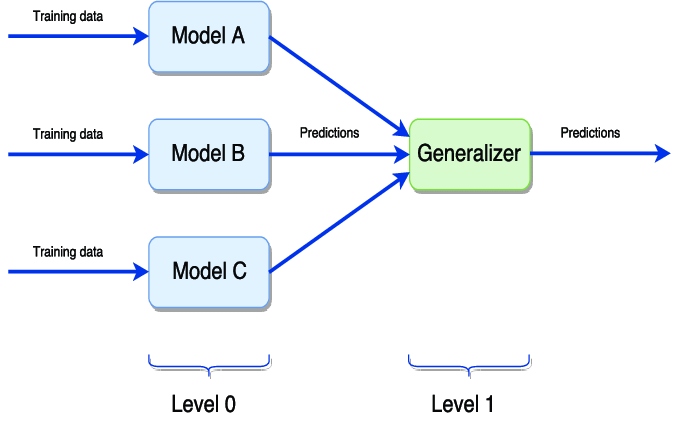

Os modelos base são muitas vezes complexos e diversos. Como tal, geralmente é uma boa ideia usar uma variedade de modelos que fazem suposições muito diferentes sobre como resolver a tarefa de modelagem preditiva, como modelos lineares, árvores de decisão, máquinas de vetor de suporte, redes neurais e muito mais. Outros algoritmos de conjunto também podem ser usados ​​como modelos base, como florestas aleatórias.

* **Modelos de base:** Use uma gama diversificada de modelos que fazem suposições diferentes sobre a tarefa de previsão.

O metamodelo geralmente é simples, fornecendo uma interpretação suave das previsões feitas pelos modelos básicos. Como tal, os modelos lineares são frequentemente usados ​​como metamodelo, como regressão linear para tarefas de regressão (prever um valor numérico) e regressão logística para tarefas de classificação (prever um rótulo de classe). Embora isso seja comum, não é obrigatório.

* **Meta-Modelo de Regressão:** Regressão Linear.
* **Meta-Modelo de Classificação:** Regressão Logística.

Mais detalhes sobre **Stacking** -----> [aqui](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).


### Encoding

Primeiramente nos codificaremos as nossas variáveis categóricas, igual fizemos com a regressão OLS, mas desta vez, utilizaremos o método 'get_dummies'

Mais sobre get_dummies [aqui](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [ ]:
# Codifica as variáveis

features = pd.get_dummies(df)
features.head()

,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,...,TipoVenda_ConLw,TipoVenda_New,TipoVenda_Oth,TipoVenda_WD,CondicaoVenda_Abnorml,CondicaoVenda_AdjLand,CondicaoVenda_Alloca,CondicaoVenda_Family,CondicaoVenda_Normal,CondicaoVenda_Partial
0,5.684507,5.831328,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.858807,6.221214,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,0.0,...,0,0,0,1,0,0,0,0,1,0
2,5.684507,5.914940,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,0.0,...,0,0,0,1,0,0,0,0,1,0
3,5.968981,5.684507,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5.684507,6.314735,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,0.0,...,0,0,0,1,0,0,0,0,1,0


### Modelling 

In [ ]:
# importar métricas de avaliação
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

# importar algoritmos de classificação 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

Agora começa a parte do stacking, nós definiremos quais serão os modelos base e qual será o metamodelo. Utilizaremos uma regressão linear como modelo de nível 1. 

Em alguns modelos base, criaremos um pipeline no qual encaixaremos um RobustScaler() para escalonar os dados. Os modelos base escolhidos foram:

* **Regressão Lasso:** A regressão Lasso significa *Least Absolute Shrinkage and Selection Operator*, ela adiciona um termo (soma absoluta dos coeficientes)de penalidade à função de custo. À medida que o valor dos coeficientes aumenta, este termo penaliza os coeficientes, diminuindo seu valor e a perda. Este modelo pode ser muito sensível a outliers, então, precisamos torná-lo mais robusto. Para isso, usamos o método Robustscaler do sklearn (recursos de escala usando estatísticas robustas para valores discrepantes). Mais informações sobre a regressão **Lasso** [aqui](https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/#:~:text=The%20difference%20between%20ridge%20and,with%20some%20types%20of%20data.).

* **Elastic Net:** Às vezes, a regressão de laço pode causar um pequeno viés no modelo onde a previsão é muito dependente de uma variável específica. Nestes casos, a rede elástica é a melhor opção, pois ela combina melhor a regularização Lasso e Ridge. **Documentação** [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

* **Kernel Ridge regressiion:** Kernel ridge regression (KRR) [M2012] combina a regressão e a classificação Ridge (mínimos quadrados lineares com regularização de norma l2) com o truque do kernel. Assim, ele aprende uma função linear no espaço induzida pelo respectivo kernel e os dados. Para kernels não lineares, isso corresponde a uma função não linear no espaço original. Mais sobre **Kernel Ridge Regression** [aqui](https://scikit-learn.org/stable/modules/kernel_ridge.html).

* **Gradient Boosting:** GB constrói um modelo aditivo de forma progressiva; ele permite a otimização de funções de perda diferenciáveis ​​arbitrárias. Em cada estágio uma árvore de regressão é ajustada no gradiente negativo da função de perda dada. Mais info [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

* **XGBoost:** XGBoost é uma biblioteca otimizada de aumento de gradiente distribuída projetada para ser altamente eficiente , flexível e portátil . Ele implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting . O XGBoost fornece um reforço de árvore paralela (também conhecido como GBDT, GBM) que resolve muitos problemas de ciência de dados de maneira rápida e precisa. O mesmo código roda nos principais ambientes distribuídos (Hadoop, SGE, MPI) e pode resolver problemas além de bilhões de exemplos. Info [aqui](https://xgboost.readthedocs.io/en/stable/index.html).

* **LightGBM:** LightGBM é uma estrutura de aumento de gradiente que usa algoritmos de aprendizado baseados em árvore. Ele foi projetado para ser distribuído e eficiente com as seguintes vantagens:

       * Velocidade de treinamento mais rápida e maior eficiência.

       * Menor uso de memória.

       * Melhor precisão.

       * Suporte de aprendizado paralelo, distribuído e GPU.

       * Capaz de lidar com dados em grande escala.

Vamos definir os modelos

In [ ]:
# Cria os modelos de nível 0 e 1

def get_stacking():
	# define os modelos base.
	level0 = list()
	level0.append(('Lasso', make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))))
	level0.append(('Enet', make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=11))))
	level0.append(('Ridge', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)))
	level0.append(('Gbr', GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                  min_samples_split=10, 
                                                  loss='huber',
                                                  random_state=42)))
	level0.append(('Xgb', XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,
                                     reg_alpha=0.4640, reg_lambda=0.8571,
                                     subsample=0.5213,
                                     random_state =7, nthread = -1)))
	level0.append(('Lgbm', LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.01, n_estimators=7000,max_bin=200, bagging_fraction=0.8,bagging_freq=4, 
                                       bagging_seed=8,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=8,
                                       min_sum_hessian_in_leaf = 11,
                                       verbose=-1,
                                       random_state=42)))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model


# Esta função cria cada modelo individualmente 
def get_models():
  models = dict()
  models['lasso'] = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))
  models['Enet'] = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=11))
  models['Ridge'] = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
  models['Gbr'] = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                              min_samples_split=10, 
                                              loss='huber',
                                              random_state=42)

  models['Xgb'] = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,
                                reg_alpha=0.4640, reg_lambda=0.8571,
                                subsample=0.5213,
                                random_state =7, nthread = -1)

  models['Lgbm'] = LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.01, n_estimators=7000,max_bin=200, bagging_fraction=0.8,bagging_freq=4, 
                                bagging_seed=8,
                                feature_fraction=0.2,
                                feature_fraction_seed=8,
                                min_sum_hessian_in_leaf = 11,
                                verbose=-1,
                                random_state=42)

  models['Stacking'] = get_stacking()


  return models

Agora iremos definir a função de avaliação

In [ ]:
# Função para avaliar o modelo utilizando validação cruzada
def evaluate_model(model, X, y):
	kf = KFold(n_splits=12, random_state=42, shuffle=True)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1, error_score='raise')
	return scores

Nosso próximo passo será o seguinte:

* Nós criaremos cada modelo individualmente utilizando a função get_models.
* Os modelos serão avaliados através da validação cruzada e nós saberemos seu 'erro'. 


>lasso -0.080 (0.009)
>Enet -0.080 (0.009)
>Ridge -0.083 (0.008)
>Gbr -0.076 (0.009)
>Xgb -0.081 (0.010)
>Lgbm -0.080 (0.008)
>Stacking -0.076 (0.009)


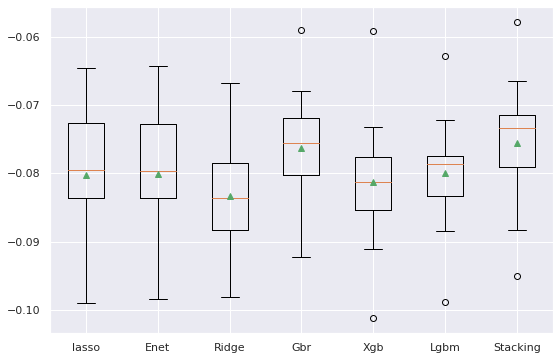

In [ ]:
models = get_models()

# avaliar os modelos e guardar os resultados 
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, features, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
# plotar o desempenho para comparação
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Pelo resultado do nosso teste, podemos ver que 'gbr' e 'Stacking' possuem o mesmo score. Qual dos dois será que vale mais a pena? 


Afim de descobrir a resposta para nossa pergunta, iremos fazer o seguinte:

* Dividiremos o nosso dataset em train e test.
* Criaremos um GradientBoostingRegressor e um modelo stacking.
* Fitar os dois modelos e realizar previsôes.
* Descobrir as métricas de precisão para ambos.
* Ver o tempo total necessário para realização de tain tarefas. 

In [ ]:
# Dividiremos o dataset em train e test

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=5)

In [ ]:
# Criamos o modelo gbr

gbr = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                              min_samples_split=10, 
                                              loss='huber',
                                              random_state=42)

In [ ]:
# fitamos e realizamos predições 

start_time = time.time()

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

time_run = (time.time() - start_time)

In [ ]:
print(f'gbr demorou {time_run} segundos')

gbr demorou 26.2273166179657 segundos


In [ ]:
# Metricas de avaliação

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.9165851397715764, 0.07684868335481736, 0.11848920205164928)

Agora que temos as metricas do gbr, vamos ver do stacking

In [ ]:
level0 = list()
level0.append(('Lasso', make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))))
level0.append(('Enet', make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=11))))
level0.append(('Ridge', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)))
level0.append(('Gbr', GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                min_samples_split=10, 
                                                loss='huber',
                                                random_state=42)))
level0.append(('Xgb', XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,
                                    reg_alpha=0.4640, reg_lambda=0.8571,
                                    subsample=0.5213,
                                    random_state =7, nthread = -1)))
level0.append(('Lgbm', LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.01, n_estimators=7000,max_bin=200, bagging_fraction=0.8,bagging_freq=4, 
                                      bagging_seed=8,
                                      feature_fraction=0.2,
                                      feature_fraction_seed=8,
                                      min_sum_hessian_in_leaf = 11,
                                      verbose=-1,
                                      random_state=42)))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model_stacking = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
start_time = time.time()

model_stacking.fit(X_train, y_train)
y_pred_stack = model_stacking.predict(X_test)

time_run = (time.time() - start_time)

[21:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(f'Stacking demorou {time_run} segundos')

Stacking demorou 200.92229533195496 segundos


In [ ]:
r2_score(y_test, y_pred_stack), mean_absolute_error(y_test, y_pred_stack), np.sqrt(mean_squared_error(y_test, y_pred_stack))

(0.9242506890872787, 0.07454183644341282, 0.11291363917079236)

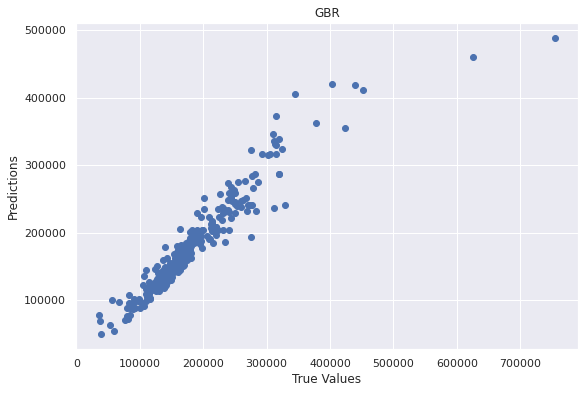

Text(0.5, 1.0, 'Stacking')

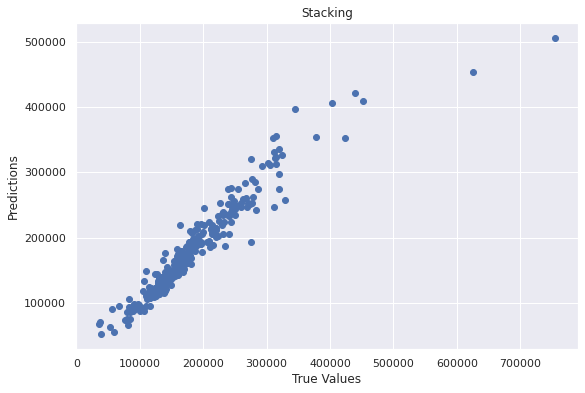

In [ ]:
plt.scatter(np.floor(np.expm1(y_test)), np.floor(np.expm1(y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('GBR')
plt.show()
plt.scatter(np.floor(np.expm1(y_test)), np.floor(np.expm1(y_pred_stack)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Stacking')

## Conclusão

Diria que nós atingimos todos os objetivos definidos anteriormente. Definimos as features mais importantes e realizamos uma regressão OLS com mais de 85% r²

Quando nós analisamos Stacking vs GBR, stacking obteve um desempenho um pouco melhor do que o gbr, entretanto, demorou muito mais tempo para compilar. Quando estamos analisando modelos, devemos considerar o custo computacional do mesmo. Eu escolheria o **gbr**